<a href="https://colab.research.google.com/github/anujp2024/Anuj-ML_Projects/blob/main/chapter_appendix-tools-for-deep-learning/jupyter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.optim.lr_scheduler as sch
from torch.utils.data import Dataset,DataLoader, random_split
import math
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from collections import defaultdict

In [2]:
data2019 = pd.read_csv('https://health.data.ny.gov/api/views/4ny4-j5zv/rows.csv?accessType=DOWNLOAD',low_memory=False)

In [3]:
data2019.head(15)

Hospital Service Area Hospital County  Operating Certificate Number  \
0          Hudson Valley     Westchester                     5902001.0   
1          Hudson Valley     Westchester                     5902001.0   
2          Hudson Valley     Westchester                     5902001.0   
3          Hudson Valley     Westchester                     5902001.0   
4          Hudson Valley     Westchester                     5902001.0   
5          Hudson Valley     Westchester                     5902001.0   
6          Hudson Valley     Westchester                     5902001.0   
7          Hudson Valley     Westchester                     5902001.0   
8          Hudson Valley     Westchester                     5902001.0   
9          Hudson Valley     Westchester                     5902001.0   
10         Hudson Valley     Westchester                     5902001.0   
11         Hudson Valley     Westchester                     5902001.0   
12         Hudson Valley     Westchester                     5902001.0   
13         New York City       Manhattan                     7002053.0   
14         New York City       Manhattan                     7002053.0   

    Permanent Facility Id                    Facility Name    Age Group  \
0                  1045.0     White Plains Hospital Center     30 to 49   
1                  1045.0     White Plains Hospital Center  70 or Older   
2                  1045.0     White Plains Hospital Center     50 to 69   
3                  1045.0     White Plains Hospital Center     50 to 69   
4                  1045.0     White Plains Hospital Center  70 or Older   
5                  1045.0     White Plains Hospital Center     50 to 69   
6                  1045.0     White Plains Hospital Center  70 or Older   
7                  1045.0     White Plains Hospital Center     50 to 69   
8                  1045.0     White Plains Hospital Center     50 to 69   
9                  1045.0     White Plains Hospital Center  70 or Older   
10                 1045.0     White Plains Hospital Center  70 or Older   
11                 1045.0     White Plains Hospital Center  70 or Older   
12                 1045.0     White Plains Hospital Center  70 or Older   
13                 1446.0  NYU Langone Orthopedic Hospital     30 to 49   
14                 1446.0  NYU Langone Orthopedic Hospital     50 to 69   

   Zip Code - 3 digits Gender                    Race          Ethnicity  ...  \
0                  106      M              Other Race  Not Span/Hispanic  ...   
1                  105      F  Black/African American  Not Span/Hispanic  ...   
2                  105      F              Other Race  Not Span/Hispanic  ...   
3                  106      F  Black/African American  Not Span/Hispanic  ...   
4                  105      F              Other Race  Not Span/Hispanic  ...   
5                  105      M              Other Race  Not Span/Hispanic  ...   
6                  OOS      F              Other Race  Not Span/Hispanic  ...   
7                  105      F              Other Race  Not Span/Hispanic  ...   
8                  106      M  Black/African American  Not Span/Hispanic  ...   
9                  105      F              Other Race  Not Span/Hispanic  ...   
10                 106      M              Other Race  Not Span/Hispanic  ...   
11                 106      F              Other Race  Not Span/Hispanic  ...   
12                 106      M              Other Race  Not Span/Hispanic  ...   
13                 OOS      M                   White  Not Span/Hispanic  ...   
14                 OOS      M                   White  Not Span/Hispanic  ...   

   APR Severity of Illness Description APR Risk of Mortality  \
0                             Moderate                 Minor   
1                             Moderate              Moderate   
2                              Extreme               Extreme   
3                             Moderate                 Minor   


In [4]:
data2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2339462 entries, 0 to 2339461
Data columns (total 33 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   Hospital Service Area                object 
 1   Hospital County                      object 
 2   Operating Certificate Number         float64
 3   Permanent Facility Id                float64
 4   Facility Name                        object 
 5   Age Group                            object 
 6   Zip Code - 3 digits                  object 
 7   Gender                               object 
 8   Race                                 object 
 9   Ethnicity                            object 
 10  Length of Stay                       object 
 11  Type of Admission                    object 
 12  Patient Disposition                  object 
 13  Discharge Year                       int64  
 14  CCSR Diagnosis Code                  object 
 15  CCSR Diagnosis Description      

# DATA WRANGLING

In [5]:
data2019 = data2019.drop(['Discharge Year'],axis = 1)

In [6]:
data2019 = data2019.drop(['Operating Certificate Number'],axis = 1)

In [7]:
data2019.isna().sum()

Hospital Service Area                     9505
Hospital County                           9505
Permanent Facility Id                     9071
Facility Name                                0
Age Group                                    0
Zip Code - 3 digits                      42930
Gender                                       0
Race                                         0
Ethnicity                                    0
Length of Stay                               0
Type of Admission                            0
Patient Disposition                          0
CCSR Diagnosis Code                         61
CCSR Diagnosis Description                  61
CCSR Procedure Code                     729699
CCSR Procedure Description              729699
APR DRG Code                                13
APR DRG Description                         13
APR MDC Code                                13
APR MDC Description                         13
APR Severity of Illness Code                13
APR Severity of Illness Description       1447
APR Risk of Mortality                     1447
APR Medical Surgical Description             0
Payment Typology 1                           0
Payment Typology 2                      968787
Payment Typology 3                     1867656
Birth Weight                           2119017
Emergency Department Indicator               0
Total Charges                                0
Total Costs                                  0
dtype: int64

In [8]:
((data2019.isna().sum())/(len(data2019)))*100   #Percentage of missing values in each columns

Hospital Service Area                   0.406290
Hospital County                         0.406290
Permanent Facility Id                   0.387739
Facility Name                           0.000000
Age Group                               0.000000
Zip Code - 3 digits                     1.835037
Gender                                  0.000000
Race                                    0.000000
Ethnicity                               0.000000
Length of Stay                          0.000000
Type of Admission                       0.000000
Patient Disposition                     0.000000
CCSR Diagnosis Code                     0.002607
CCSR Diagnosis Description              0.002607
CCSR Procedure Code                    31.190889
CCSR Procedure Description             31.190889
APR DRG Code                            0.000556
APR DRG Description                     0.000556
APR MDC Code                            0.000556
APR MDC Description                     0.000556
APR Severity of Illness Code            0.000556
APR Severity of Illness Description     0.061852
APR Risk of Mortality                   0.061852
APR Medical Surgical Description        0.000000
Payment Typology 1                      0.000000
Payment Typology 2                     41.410675
Payment Typology 3                     79.832714
Birth Weight                           90.577107
Emergency Department Indicator          0.000000
Total Charges                           0.000000
Total Costs                             0.000000
dtype: float64

Dropping rows of missing values for columns with relatively small percentage of missing values.

In [9]:
data2019.dropna(subset=['Hospital Service Area','CCSR Diagnosis Code','Zip Code - 3 digits','APR MDC Code','APR Severity of Illness Description'],inplace=True)

In [10]:
((data2019.isna().sum())/(len(data2019)))*100

Hospital Service Area                   0.000000
Hospital County                         0.000000
Permanent Facility Id                   0.000000
Facility Name                           0.000000
Age Group                               0.000000
Zip Code - 3 digits                     0.000000
Gender                                  0.000000
Race                                    0.000000
Ethnicity                               0.000000
Length of Stay                          0.000000
Type of Admission                       0.000000
Patient Disposition                     0.000000
CCSR Diagnosis Code                     0.000000
CCSR Diagnosis Description              0.000000
CCSR Procedure Code                    31.175552
CCSR Procedure Description             31.175552
APR DRG Code                            0.000000
APR DRG Description                     0.000000
APR MDC Code                            0.000000
APR MDC Description                     0.000000
APR Severity of Illness Code            0.000000
APR Severity of Illness Description     0.000000
APR Risk of Mortality                   0.000000
APR Medical Surgical Description        0.000000
Payment Typology 1                      0.000000
Payment Typology 2                     41.234903
Payment Typology 3                     79.757226
Birth Weight                           90.596960
Emergency Department Indicator          0.000000
Total Charges                           0.000000
Total Costs                             0.000000
dtype: float64

In [11]:
data2019['Length of Stay'].unique()

array(['2', '3', '7', '1', '5', '9', '4', '37', '48', '6', '39', '16',
       '8', '29', '50', '49', '42', '35', '21', '14', '12', '23', '10',
       '19', '17', '13', '20', '18', '11', '25', '15', '22', '61', '28',
       '114', '103', '68', '38', '32', '31', '45', '52', '26', '27', '40',
       '41', '43', '69', '66', '57', '59', '44', '24', '67', '120 +',
       '33', '94', '99', '85', '80', '75', '64', '51', '30', '56', '36',
       '88', '34', '93', '107', '47', '111', '55', '92', '58', '46', '53',
       '60', '54', '119', '97', '77', '71', '74', '89', '76', '106', '96',
       '63', '82', '70', '62', '78', '65', '83', '113', '109', '81',
       '100', '112', '91', '87', '73', '79', '117', '86', '72', '95',
       '101', '90', '84', '105', '118', '108', '102', '115', '98', '110',
       '104', '116'], dtype=object)

In [12]:
data2019['Length of Stay'] = data2019['Length of Stay'].replace('120 +', '120')
data2019 = data2019.astype({"Length of Stay":'int'})

In [13]:
data2019['Length of Stay'].dtypes

dtype('int64')

In [14]:
data2019['Type of Admission'].value_counts()['Newborn']

np.int64(206478)

In [15]:
data2019['Birth Weight'].count()

np.int64(215766)

Converting the object columns 'Length of Stay' and 'Zip Code - 3 digits' to integer datatypes for regression analysis.

In [16]:
data2019['Zip Code - 3 digits'].unique()

array(['106', '105', 'OOS', '103', '112', '104', '113', '100', '115',
       '108', '107', '109', '114', '111', '117', '140', '125', '121',
       '122', '120', '123', '137', '128', '119', '116', '118', '110',
       '101', '139', '138', '124', '126', '142', '143', '134', '147',
       '145', '141', '133', '135', '148', '146', '131', '144', '132',
       '130', '136', '129', '149', '127'], dtype=object)

On looking up at the information about the dataset on SPARCS site, 'OOS' refers to Out of State zip codes. This information could be very useful for our analysis. Replace 'OOS' code with '999' which now indicates out of state.

In [17]:
data2019['Zip Code - 3 digits'] = data2019['Zip Code - 3 digits'].replace('OOS', '999')
data2019 = data2019.astype({"Zip Code - 3 digits":'int'})

In [18]:
data2019['Zip Code - 3 digits'].dtypes

dtype('int64')

Observing the Dataset

In [19]:
data2019.head()

Hospital Service Area Hospital County  Permanent Facility Id  \
0         Hudson Valley     Westchester                 1045.0   
1         Hudson Valley     Westchester                 1045.0   
2         Hudson Valley     Westchester                 1045.0   
3         Hudson Valley     Westchester                 1045.0   
4         Hudson Valley     Westchester                 1045.0   

                  Facility Name    Age Group  Zip Code - 3 digits Gender  \
0  White Plains Hospital Center     30 to 49                  106      M   
1  White Plains Hospital Center  70 or Older                  105      F   
2  White Plains Hospital Center     50 to 69                  105      F   
3  White Plains Hospital Center     50 to 69                  106      F   
4  White Plains Hospital Center  70 or Older                  105      F   

                     Race          Ethnicity  Length of Stay  ...  \
0              Other Race  Not Span/Hispanic               2  ...   
1  Black/African American  Not Span/Hispanic               3  ...   
2              Other Race  Not Span/Hispanic               7  ...   
3  Black/African American  Not Span/Hispanic               1  ...   
4              Other Race  Not Span/Hispanic               3  ...   

  APR Severity of Illness Description APR Risk of Mortality  \
0                            Moderate                 Minor   
1                            Moderate              Moderate   
2                             Extreme               Extreme   
3                            Moderate                 Minor   
4                            Moderate              Moderate   

  APR Medical Surgical Description        Payment Typology 1  \
0                          Medical  Private Health Insurance   
1                          Medical                  Medicare   
2                         Surgical                  Medicare   
3                          Medical                  Medicare   
4                          Medical                  Medicare   

         Payment Typology 2 Payment Typology 3  Birth Weight  \
0                       NaN                NaN           NaN   
1                       NaN                NaN           NaN   
2    Blue Cross/Blue Shield                NaN           NaN   
3                  Medicaid                NaN           NaN   
4  Private Health Insurance                NaN           NaN   

  Emergency Department Indicator  Total Charges Total Costs  
0                           True        26507.0     4773.11  
1                           True        20693.0     5631.30  
2                          False       138252.0    29848.69  
3                           True        11799.0     2595.72  
4                           True        52711.0    11355.62  

[5 rows x 31 columns]

In [20]:
data2019.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2294641 entries, 0 to 2339461
Data columns (total 31 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   Hospital Service Area                object 
 1   Hospital County                      object 
 2   Permanent Facility Id                float64
 3   Facility Name                        object 
 4   Age Group                            object 
 5   Zip Code - 3 digits                  int64  
 6   Gender                               object 
 7   Race                                 object 
 8   Ethnicity                            object 
 9   Length of Stay                       int64  
 10  Type of Admission                    object 
 11  Patient Disposition                  object 
 12  CCSR Diagnosis Code                  object 
 13  CCSR Diagnosis Description           object 
 14  CCSR Procedure Code                  object 
 15  CCSR Procedure Description           

In [21]:
data2019.nunique()

Hospital Service Area                        8
Hospital County                             56
Permanent Facility Id                      207
Facility Name                              204
Age Group                                    5
Zip Code - 3 digits                         50
Gender                                       3
Race                                         4
Ethnicity                                    4
Length of Stay                             120
Type of Admission                            6
Patient Disposition                         20
CCSR Diagnosis Code                        472
CCSR Diagnosis Description                 472
CCSR Procedure Code                        313
CCSR Procedure Description                 313
APR DRG Code                               319
APR DRG Description                        319
APR MDC Code                                24
APR MDC Description                         24
APR Severity of Illness Code                 4
APR Severity of Illness Description          4
APR Risk of Mortality                        4
APR Medical Surgical Description             2
Payment Typology 1                           9
Payment Typology 2                           9
Payment Typology 3                           9
Birth Weight                                76
Emergency Department Indicator               2
Total Charges                          1887632
Total Costs                            1568981
dtype: int64

In [22]:
data2019['Gender'].unique()

array(['M', 'F', 'U'], dtype=object)

In [23]:
data2019['APR MDC Description'].unique()

array(['INFECTIOUS AND PARASITIC DISEASES (SYSTEMIC OR UNSPECIFIED SITES)',
       'DISEASES AND DISORDERS OF THE KIDNEY AND URINARY TRACT',
       'DISEASES AND DISORDERS OF THE RESPIRATORY SYSTEM',
       'INJURIES, POISONINGS AND TOXIC EFFECTS OF DRUGS',
       'DISEASES AND DISORDERS OF THE MUSCULOSKELETAL SYSTEM AND CONNECTIVE TISSUE',
       'DISEASES AND DISORDERS OF THE DIGESTIVE SYSTEM',
       'DISEASES AND DISORDERS OF THE CIRCULATORY SYSTEM',
       'DISEASES AND DISORDERS OF THE SKIN, SUBCUTANEOUS TISSUE AND BREAST',
       'MENTAL DISEASES AND DISORDERS',
       'ALCOHOL/DRUG USE AND ALCOHOL/DRUG INDUCED ORGANIC MENTAL DISORDERS',
       'DISEASES AND DISORDERS OF THE BLOOD AND BLOOD FORMING ORGANS AND IMMUNOLOGICAL DISORDERS',
       'MULTIPLE SIGNIFICANT TRAUMA',
       'ENDOCRINE, NUTRITIONAL AND METABOLIC DISEASES AND DISORDERS',
       'DISEASES AND DISORDERS OF THE NERVOUS SYSTEM',
       'DISEASES AND DISORDERS OF THE FEMALE REPRODUCTIVE SYSTEM',
       'FACTORS IN

In [24]:
data2019['APR MDC Description'].value_counts()

APR MDC Description
DISEASES AND DISORDERS OF THE CIRCULATORY SYSTEM                                            301338
PREGNANCY, CHILDBIRTH AND THE PUERPERIUM                                                    228525
NEWBORNS AND OTHER NEONATES WITH CONDITIONS ORIGINATING IN THE PERINATAL PERIOD             212510
DISEASES AND DISORDERS OF THE MUSCULOSKELETAL SYSTEM AND CONNECTIVE TISSUE                  208445
DISEASES AND DISORDERS OF THE RESPIRATORY SYSTEM                                            185788
DISEASES AND DISORDERS OF THE DIGESTIVE SYSTEM                                              181318
INFECTIOUS AND PARASITIC DISEASES (SYSTEMIC OR UNSPECIFIED SITES)                           155945
DISEASES AND DISORDERS OF THE NERVOUS SYSTEM                                                155158
MENTAL DISEASES AND DISORDERS                                                               105755
DISEASES AND DISORDERS OF THE KIDNEY AND URINARY TRACT                                      101684
ALCOHOL/DRUG USE AND ALCOHOL/DRUG INDUCED ORGANIC MENTAL DISORDERS                           77950
ENDOCRINE, NUTRITIONAL AND METABOLIC DISEASES AND DISORDERS                                  77618
DISEASES AND DISORDERS OF THE HEPATOBILIARY SYSTEM AND PANCREAS                              63627
DISEASES AND DISORDERS OF THE SKIN, SUBCUTANEOUS TISSUE AND BREAST                           54055
DISEASES AND DISORDERS OF THE BLOOD AND BLOOD FORMING ORGANS AND IMMUNOLOGICAL DISORDERS     33174
DISEASES AND DISORDERS OF THE EAR, NOSE, MOUTH AND THROAT                                    31529
FACTORS INFLUENCING HEALTH STATUS AND OTHER CONTACTS WITH HEALTH SERVICES                    29466
INJURIES, POISONINGS AND TOXIC EFFECTS OF DRUGS                                              29030
MYELOPROLIFERATIVE DISEASES AND DISORDERS, AND POORLY DIFFERENTIATED NEOPLASM                22369
DISEASES AND DISORDERS OF THE FEMALE REPRODUCTIVE SYSTEM                                     19796
DISEASES AND DISORDERS OF THE MALE REPRODUCTIVE SYSTEM                                        9357
MULTIPLE SIGNIFICANT TRAUMA                                                                   4644
DISEASES AND DISORDERS OF THE EYE                                                             3577
BURNS                                                                                         1983
Name: count, dtype: int64

In [25]:
data2019['APR MDC Code'].value_counts()

APR MDC Code
5.0     301338
14.0    228525
15.0    212510
8.0     208445
4.0     185788
6.0     181318
18.0    155945
1.0     155158
19.0    105755
11.0    101684
20.0     77950
10.0     77618
7.0      63627
9.0      54055
16.0     33174
3.0      31529
23.0     29466
21.0     29030
17.0     22369
13.0     19796
12.0      9357
25.0      4644
2.0       3577
22.0      1983
Name: count, dtype: int64

In [26]:
data2019[data2019['APR MDC Description'] == 'DISEASES AND DISORDERS OF THE KIDNEY AND URINARY TRACT'].info()

<class 'pandas.core.frame.DataFrame'>
Index: 101684 entries, 1 to 2339459
Data columns (total 31 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Hospital Service Area                101684 non-null  object 
 1   Hospital County                      101684 non-null  object 
 2   Permanent Facility Id                101684 non-null  float64
 3   Facility Name                        101684 non-null  object 
 4   Age Group                            101684 non-null  object 
 5   Zip Code - 3 digits                  101684 non-null  int64  
 6   Gender                               101684 non-null  object 
 7   Race                                 101684 non-null  object 
 8   Ethnicity                            101684 non-null  object 
 9   Length of Stay                       101684 non-null  int64  
 10  Type of Admission                    101684 non-null  object 
 11  Patient Dispositi

In [27]:
data2019['APR MDC Code'].unique()

array([18., 11.,  4., 21.,  8.,  6.,  5.,  9., 19., 20., 16., 25., 10.,
        1., 13., 23.,  7., 15., 14., 17.,  2.,  3., 12., 22.])

Data Analysis and Visualization


In [28]:
data2019.corr(numeric_only = True)

Permanent Facility Id  Zip Code - 3 digits  \
Permanent Facility Id                        1.000000            -0.004672   
Zip Code - 3 digits                         -0.004672             1.000000   
Length of Stay                               0.008692            -0.003524   
APR DRG Code                                 0.042908            -0.023067   
APR MDC Code                                 0.040792            -0.021422   
APR Severity of Illness Code                -0.040781            -0.001728   
Emergency Department Indicator              -0.040176            -0.067897   
Total Charges                                0.060674             0.037873   
Total Costs                                  0.048323             0.041462   

                                Length of Stay  APR DRG Code  APR MDC Code  \
Permanent Facility Id                 0.008692      0.042908      0.040792   
Zip Code - 3 digits                  -0.003524     -0.023067     -0.021422   
Length of Stay                        1.000000      0.058006      0.083673   
APR DRG Code                          0.058006      1.000000      0.966927   
APR MDC Code                          0.083673      0.966927      1.000000   
APR Severity of Illness Code          0.329021     -0.135798     -0.125979   
Emergency Department Indicator        0.053011     -0.197549     -0.198772   
Total Charges                         0.670804     -0.095753     -0.065629   
Total Costs                           0.668386     -0.082014     -0.051810   

                                APR Severity of Illness Code  \
Permanent Facility Id                              -0.040781   
Zip Code - 3 digits                                -0.001728   
Length of Stay                                      0.329021   
APR DRG Code                                       -0.135798   
APR MDC Code                                       -0.125979   
APR Severity of Illness Code                        1.000000   
Emergency Department Indicator                      0.304000   
Total Charges                                       0.295896   
Total Costs                                         0.279420   

                                Emergency Department Indicator  Total Charges  \
Permanent Facility Id                                -0.040176       0.060674   
Zip Code - 3 digits                                  -0.067897       0.037873   
Length of Stay                                        0.053011       0.670804   
APR DRG Code                                         -0.197549      -0.095753   
APR MDC Code                                         -0.198772      -0.065629   
APR Severity of Illness Code                          0.304000       0.295896   
Emergency Department Indicator                        1.000000      -0.009939   
Total Charges                                        -0.009939       1.000000   
Total Costs                                          -0.014700       0.861817   

                                Total Costs  
Permanent Facility Id              0.048323  
Zip Code - 3 digits                0.041462  
Length of Stay                     0.668386  
APR DRG Code                      -0.082014  
APR MDC Code                      -0.051810  
APR Severity of Illness Code       0.279420  
Emergency Department Indicator    -0.014700  
Total Charges                      0.861817  
Total Costs                        1.000000

<Axes: >

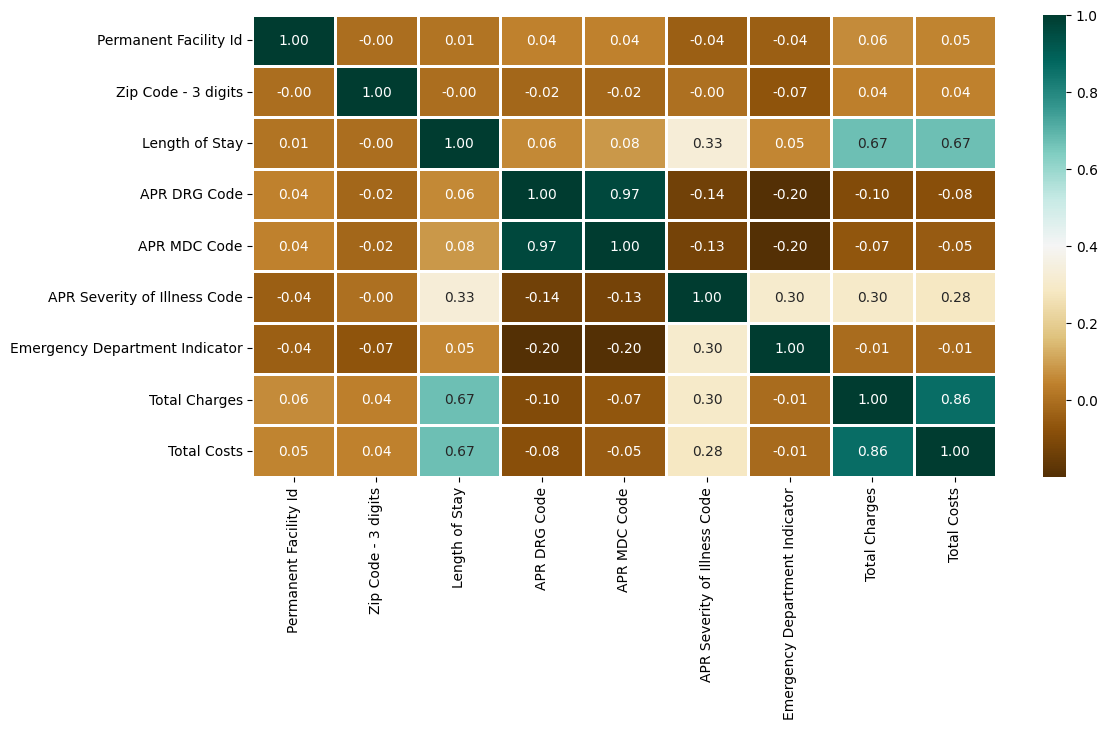

In [29]:
plt.figure(figsize=(12,6))

sns.heatmap(data2019.corr(numeric_only = True),
            cmap='BrBG',
            fmt='.2f',
            linewidths=2,
            annot=True)

Although the correlation matrix does not make sense to look at for all of our columns, we can see from it that APR Severity of Illness Code has a positive correlation with length of stay, along with total charges and total costs.

<Figure size 1600x1400 with 0 Axes>

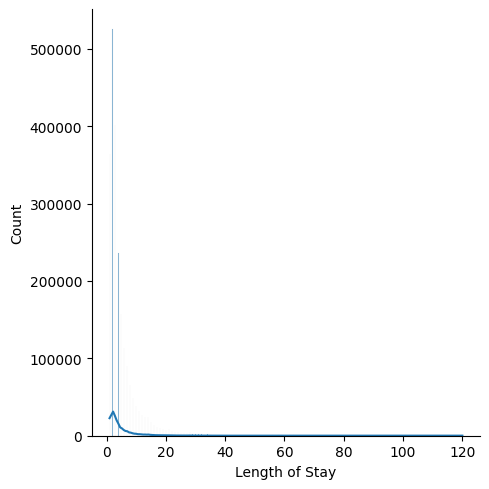

In [30]:
plt.figure(figsize = (16,14))
sns.displot(data2019['Length of Stay'],kde = True)

distribution is positively skewed

/tmp/ipython-input-3057932165.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data2019['Total Costs'], norm_hist=False);


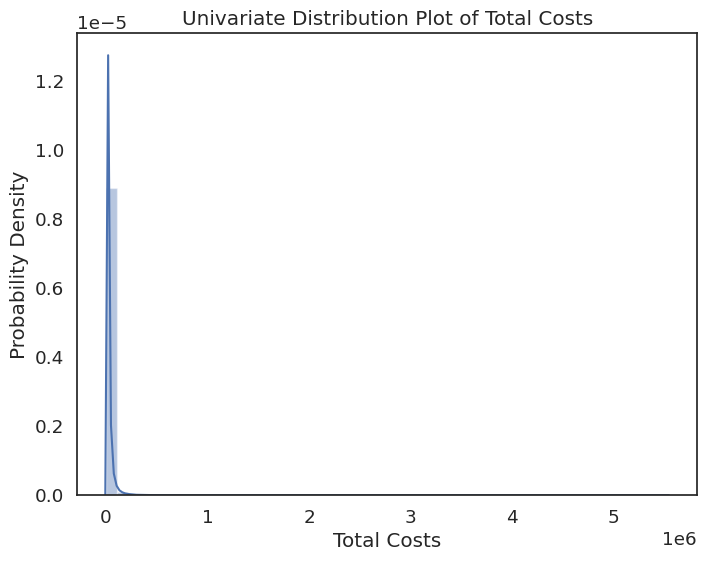

In [31]:
sns.set(font_scale=1.2)
sns.set_style("white")
f, ax = plt.subplots(figsize=(8, 6))
sns.distplot(data2019['Total Costs'], norm_hist=False);
plt.ylabel('Probability Density')
plt.title('Univariate Distribution Plot of Total Costs')
plt.show()

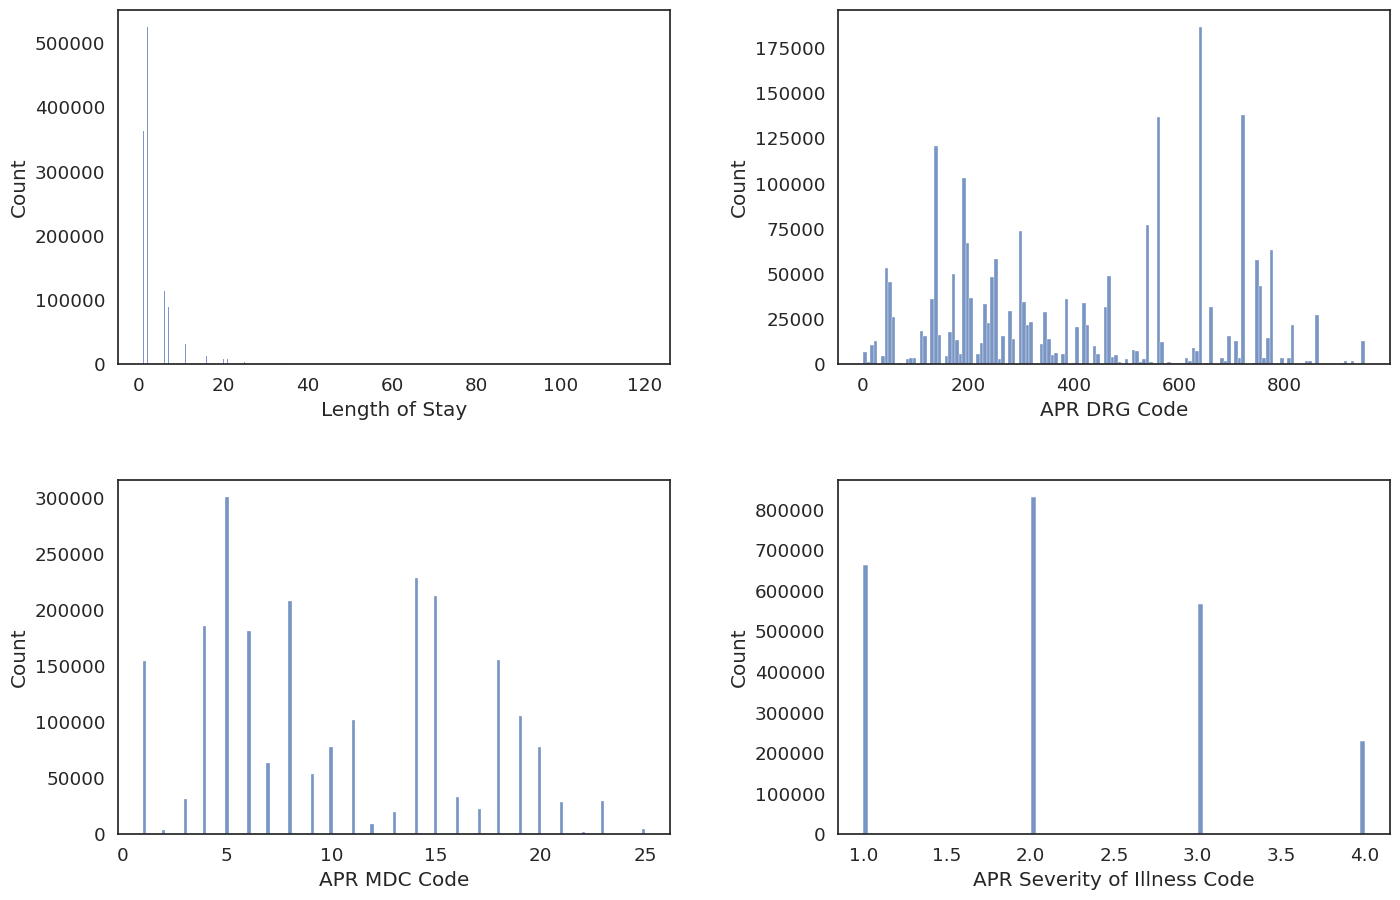

In [32]:
lis = ['Length of Stay', 'APR DRG Code','APR MDC Code','APR Severity of Illness Code']

plt.figure(figsize=(15, 10))   # use plt.figure, not plt.subplots here
index = 1

for i in lis:
    plt.subplot(2, 2, index)
    sns.histplot(data2019[i], kde=False)   # distplot is deprecated
    index += 1

# Automatically adjust spacing
plt.tight_layout(pad=3.0)  # pad increases spacing between plots
plt.show()

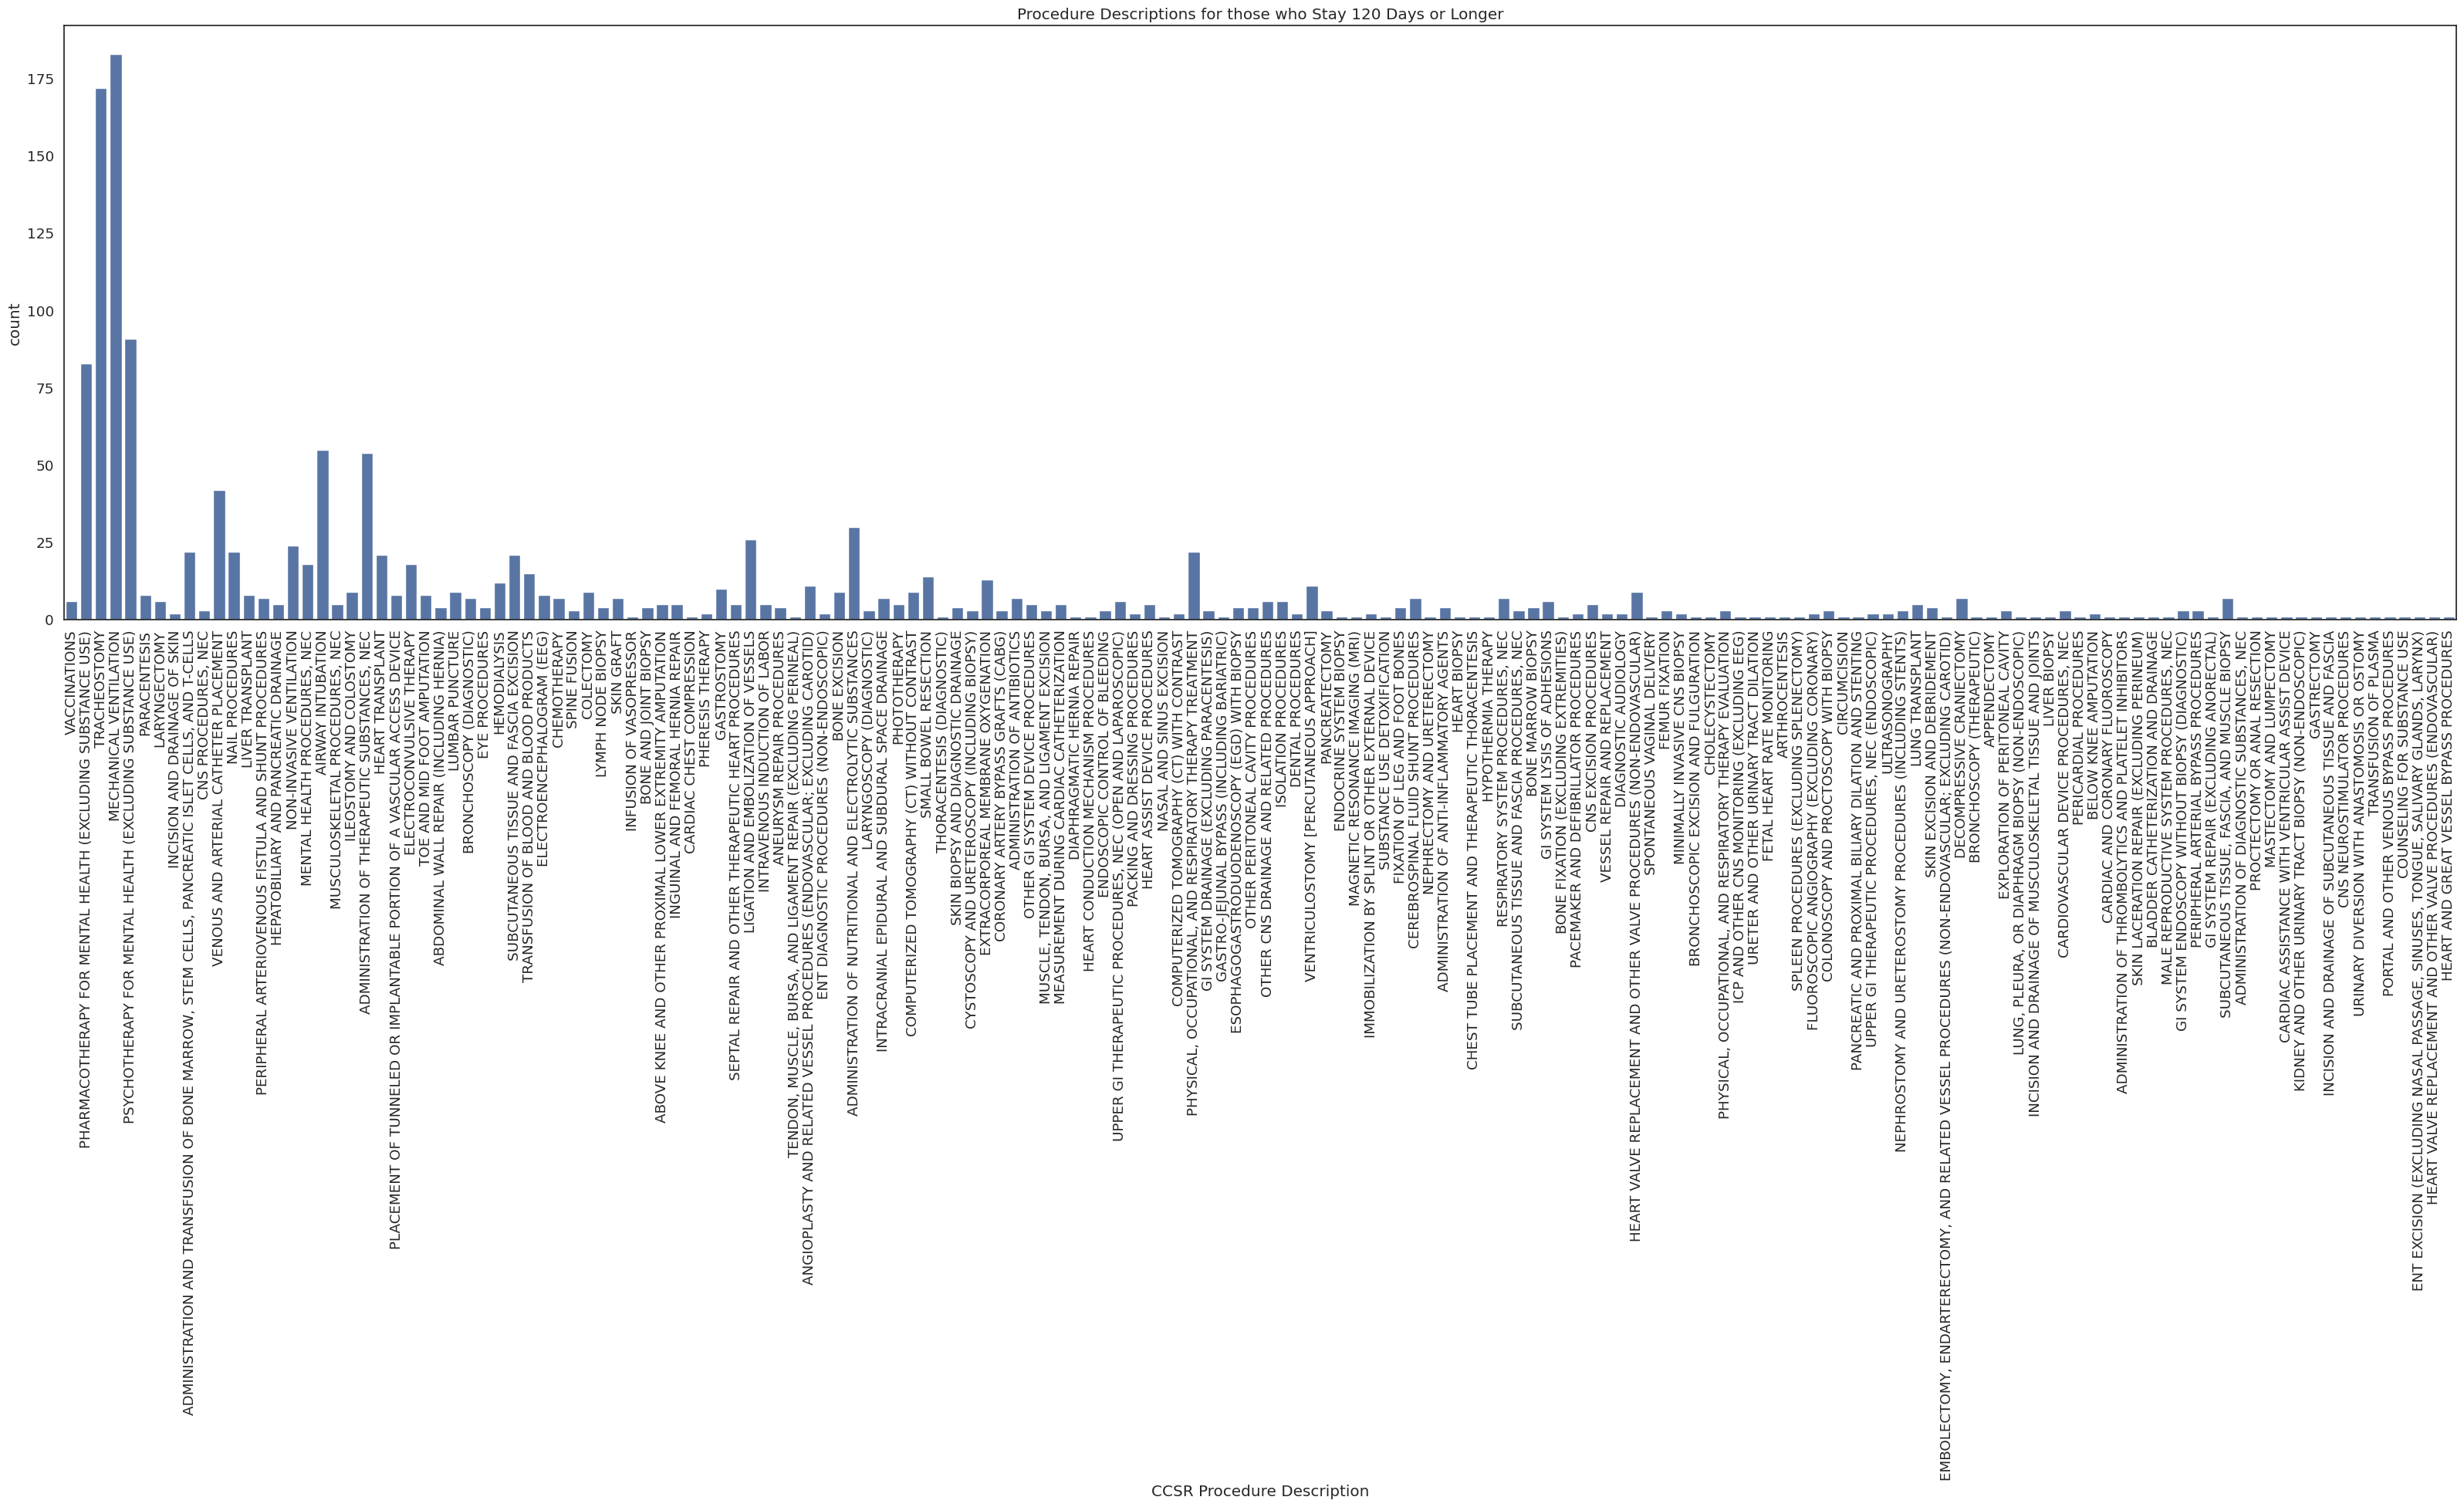

In [33]:
f, ax = plt.subplots(figsize=(40, 10))
sns.countplot(x='CCSR Procedure Description', data = data2019[data2019['Length of Stay']==120])
plt.xticks(rotation=90)
plt.title('Procedure Descriptions for those who Stay 120 Days or Longer')
plt.show()

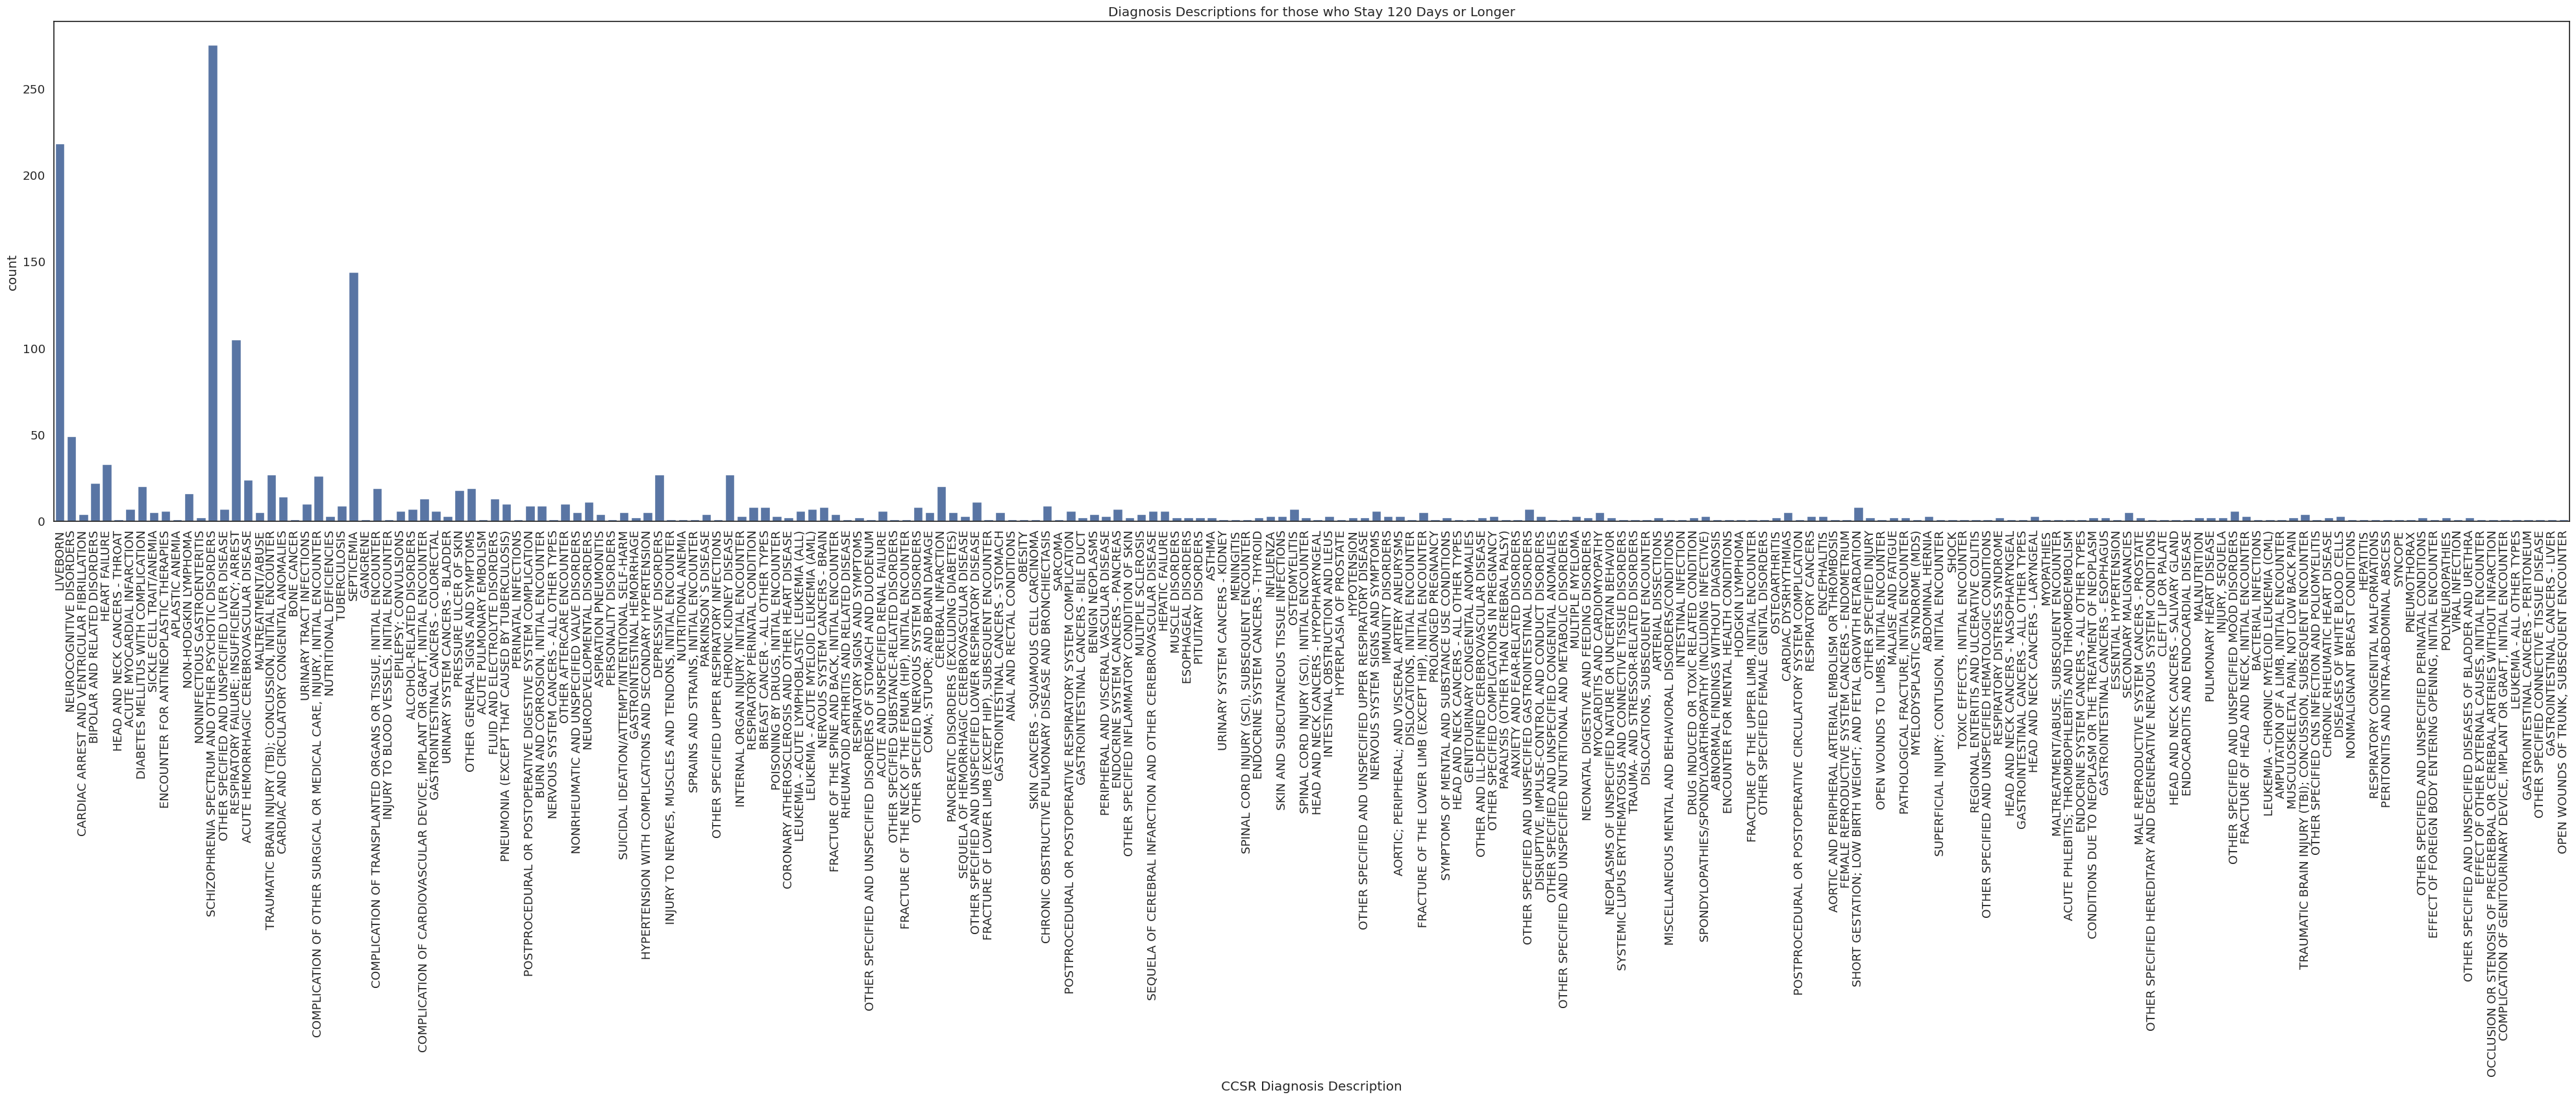

In [34]:
f, ax = plt.subplots(figsize=(50, 10))
sns.countplot(x='CCSR Diagnosis Description', data = data2019[data2019['Length of Stay']==120])
plt.xticks(rotation=90)
plt.title('Diagnosis Descriptions for those who Stay 120 Days or Longer')
plt.show()

This may imply that if a person requires to be put on a mechanical ventilator and is having respiratory issues, there is a high probability that they will have a long stay at the hospital (120+ days)

/tmp/ipython-input-1702828689.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.countplot(x='CCSR Diagnosis Description', data = data2019[data2019['Total Costs']>=500000][data2019['Total Costs']<=1000000])


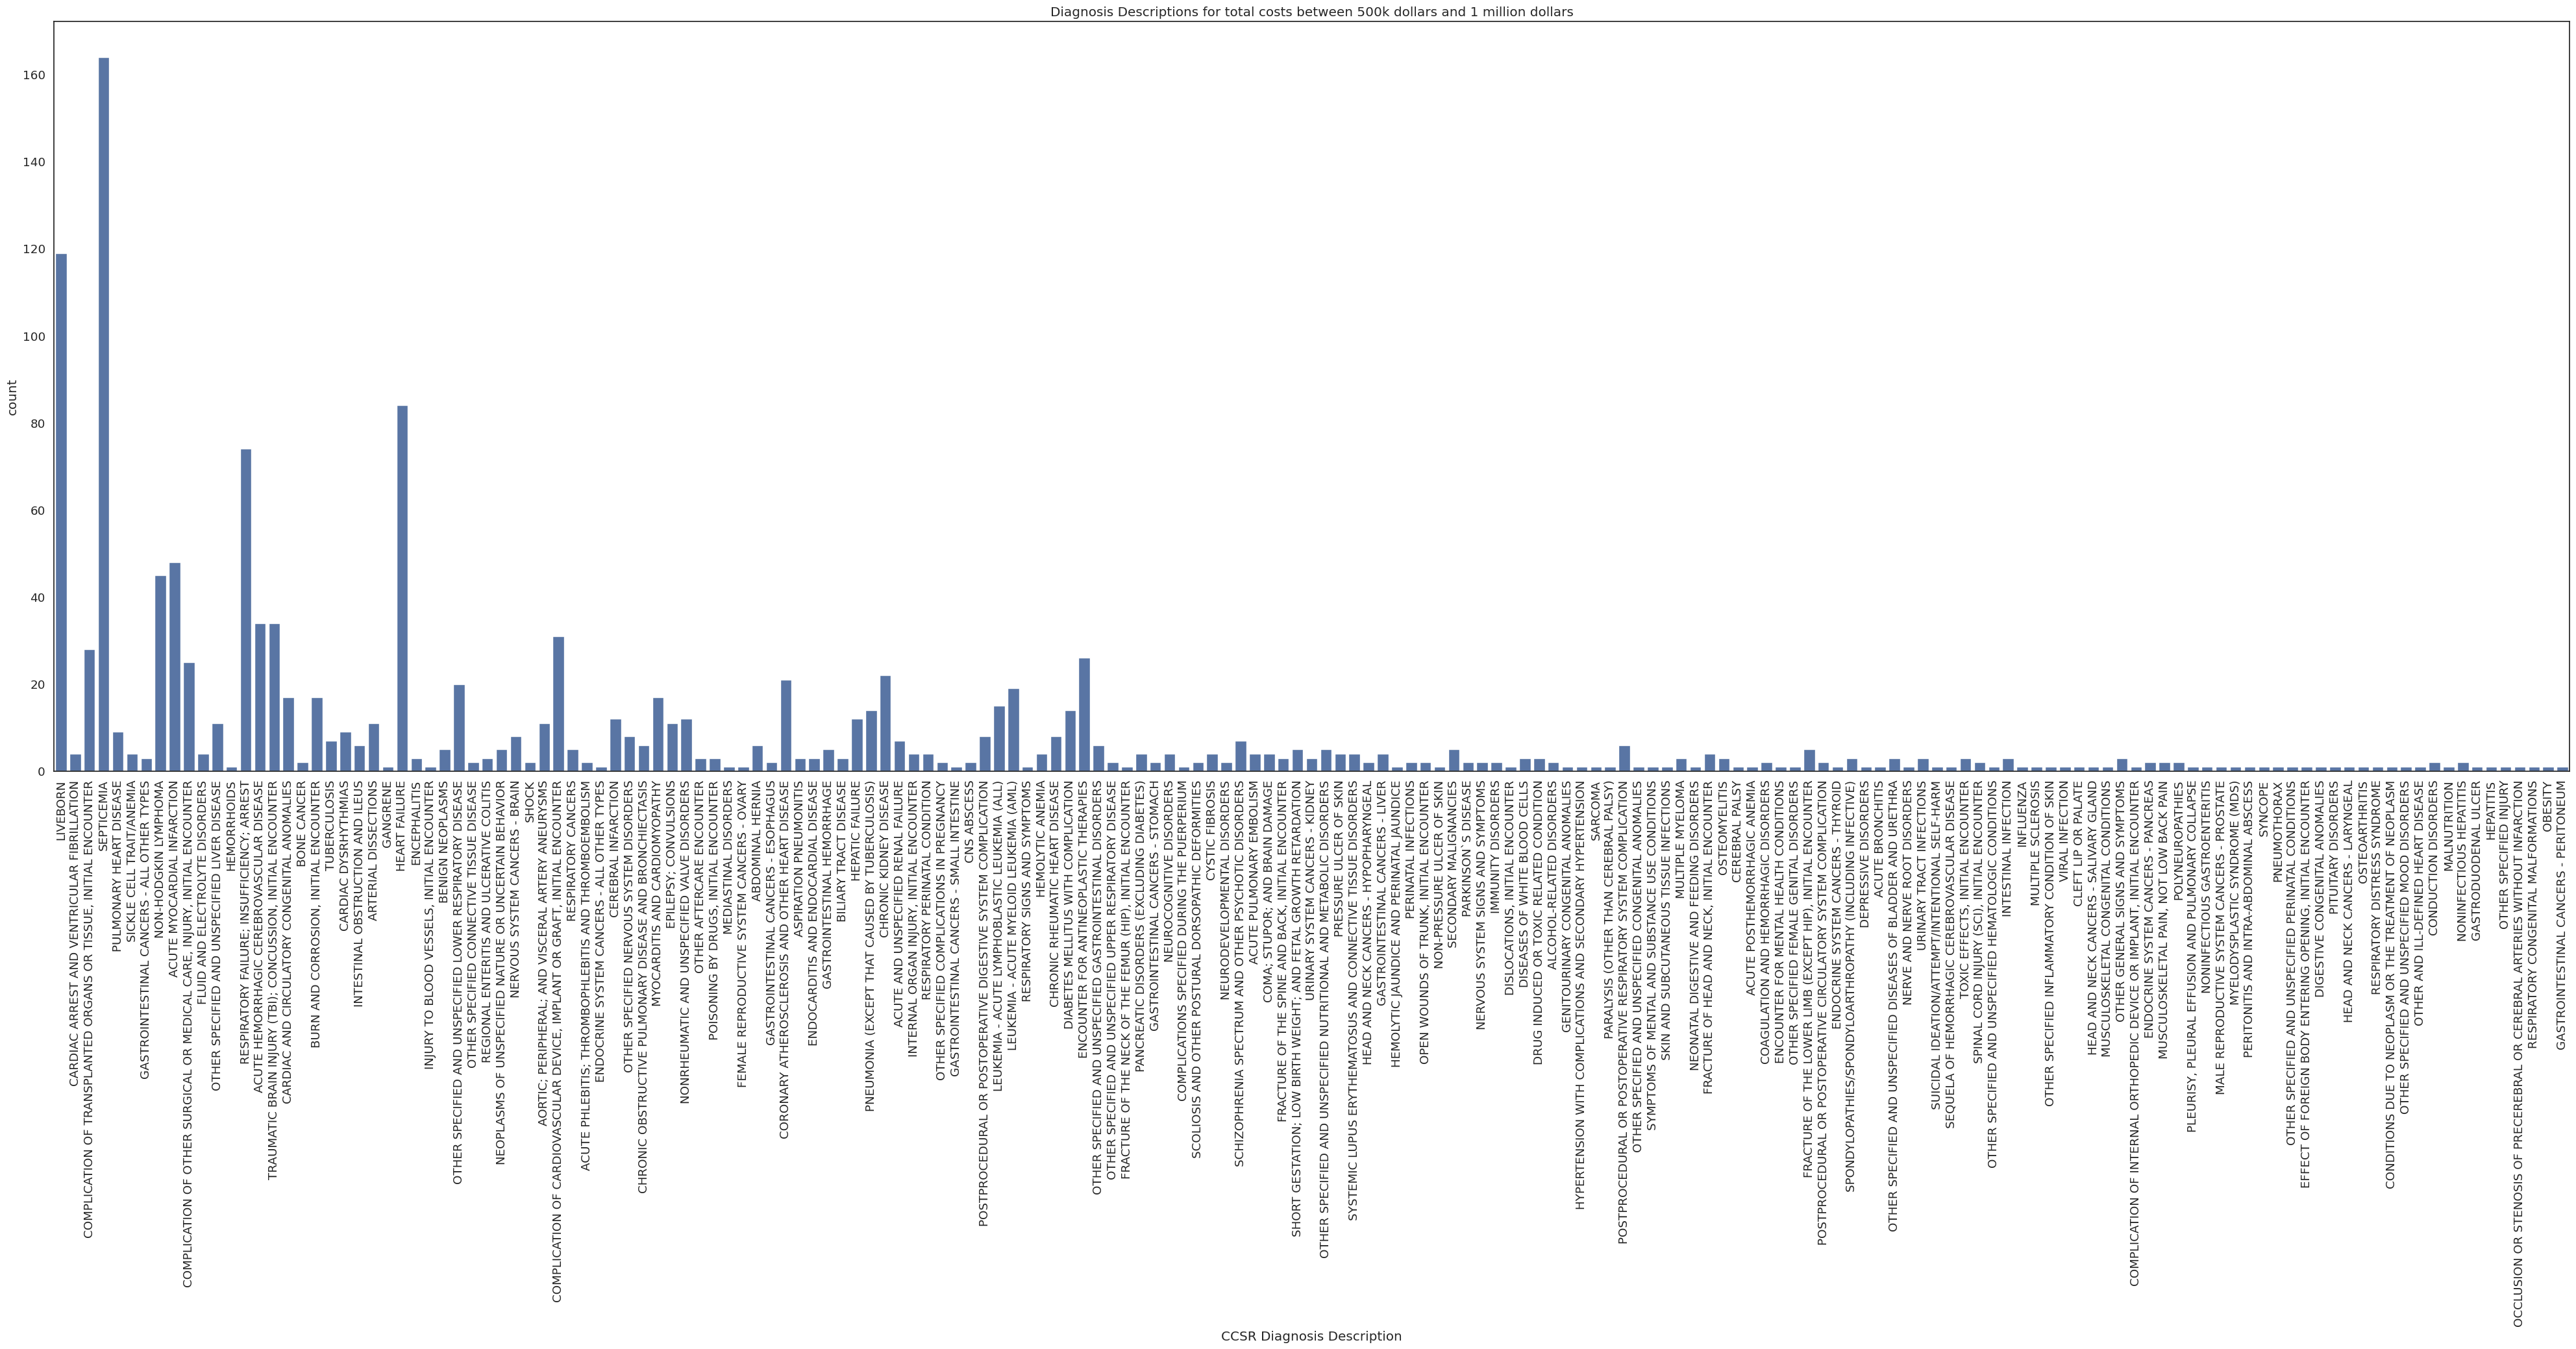

In [35]:
f, ax = plt.subplots(figsize=(50, 15))
sns.countplot(x='CCSR Diagnosis Description', data = data2019[data2019['Total Costs']>=500000][data2019['Total Costs']<=1000000])
plt.xticks(rotation=90)
plt.title('Diagnosis Descriptions for total costs between 500k dollars and 1 million dollars')
plt.show()

This may imply that if a person has Respiratory failure/arrest, there is a high probability that they will be charged around 500k dollars.

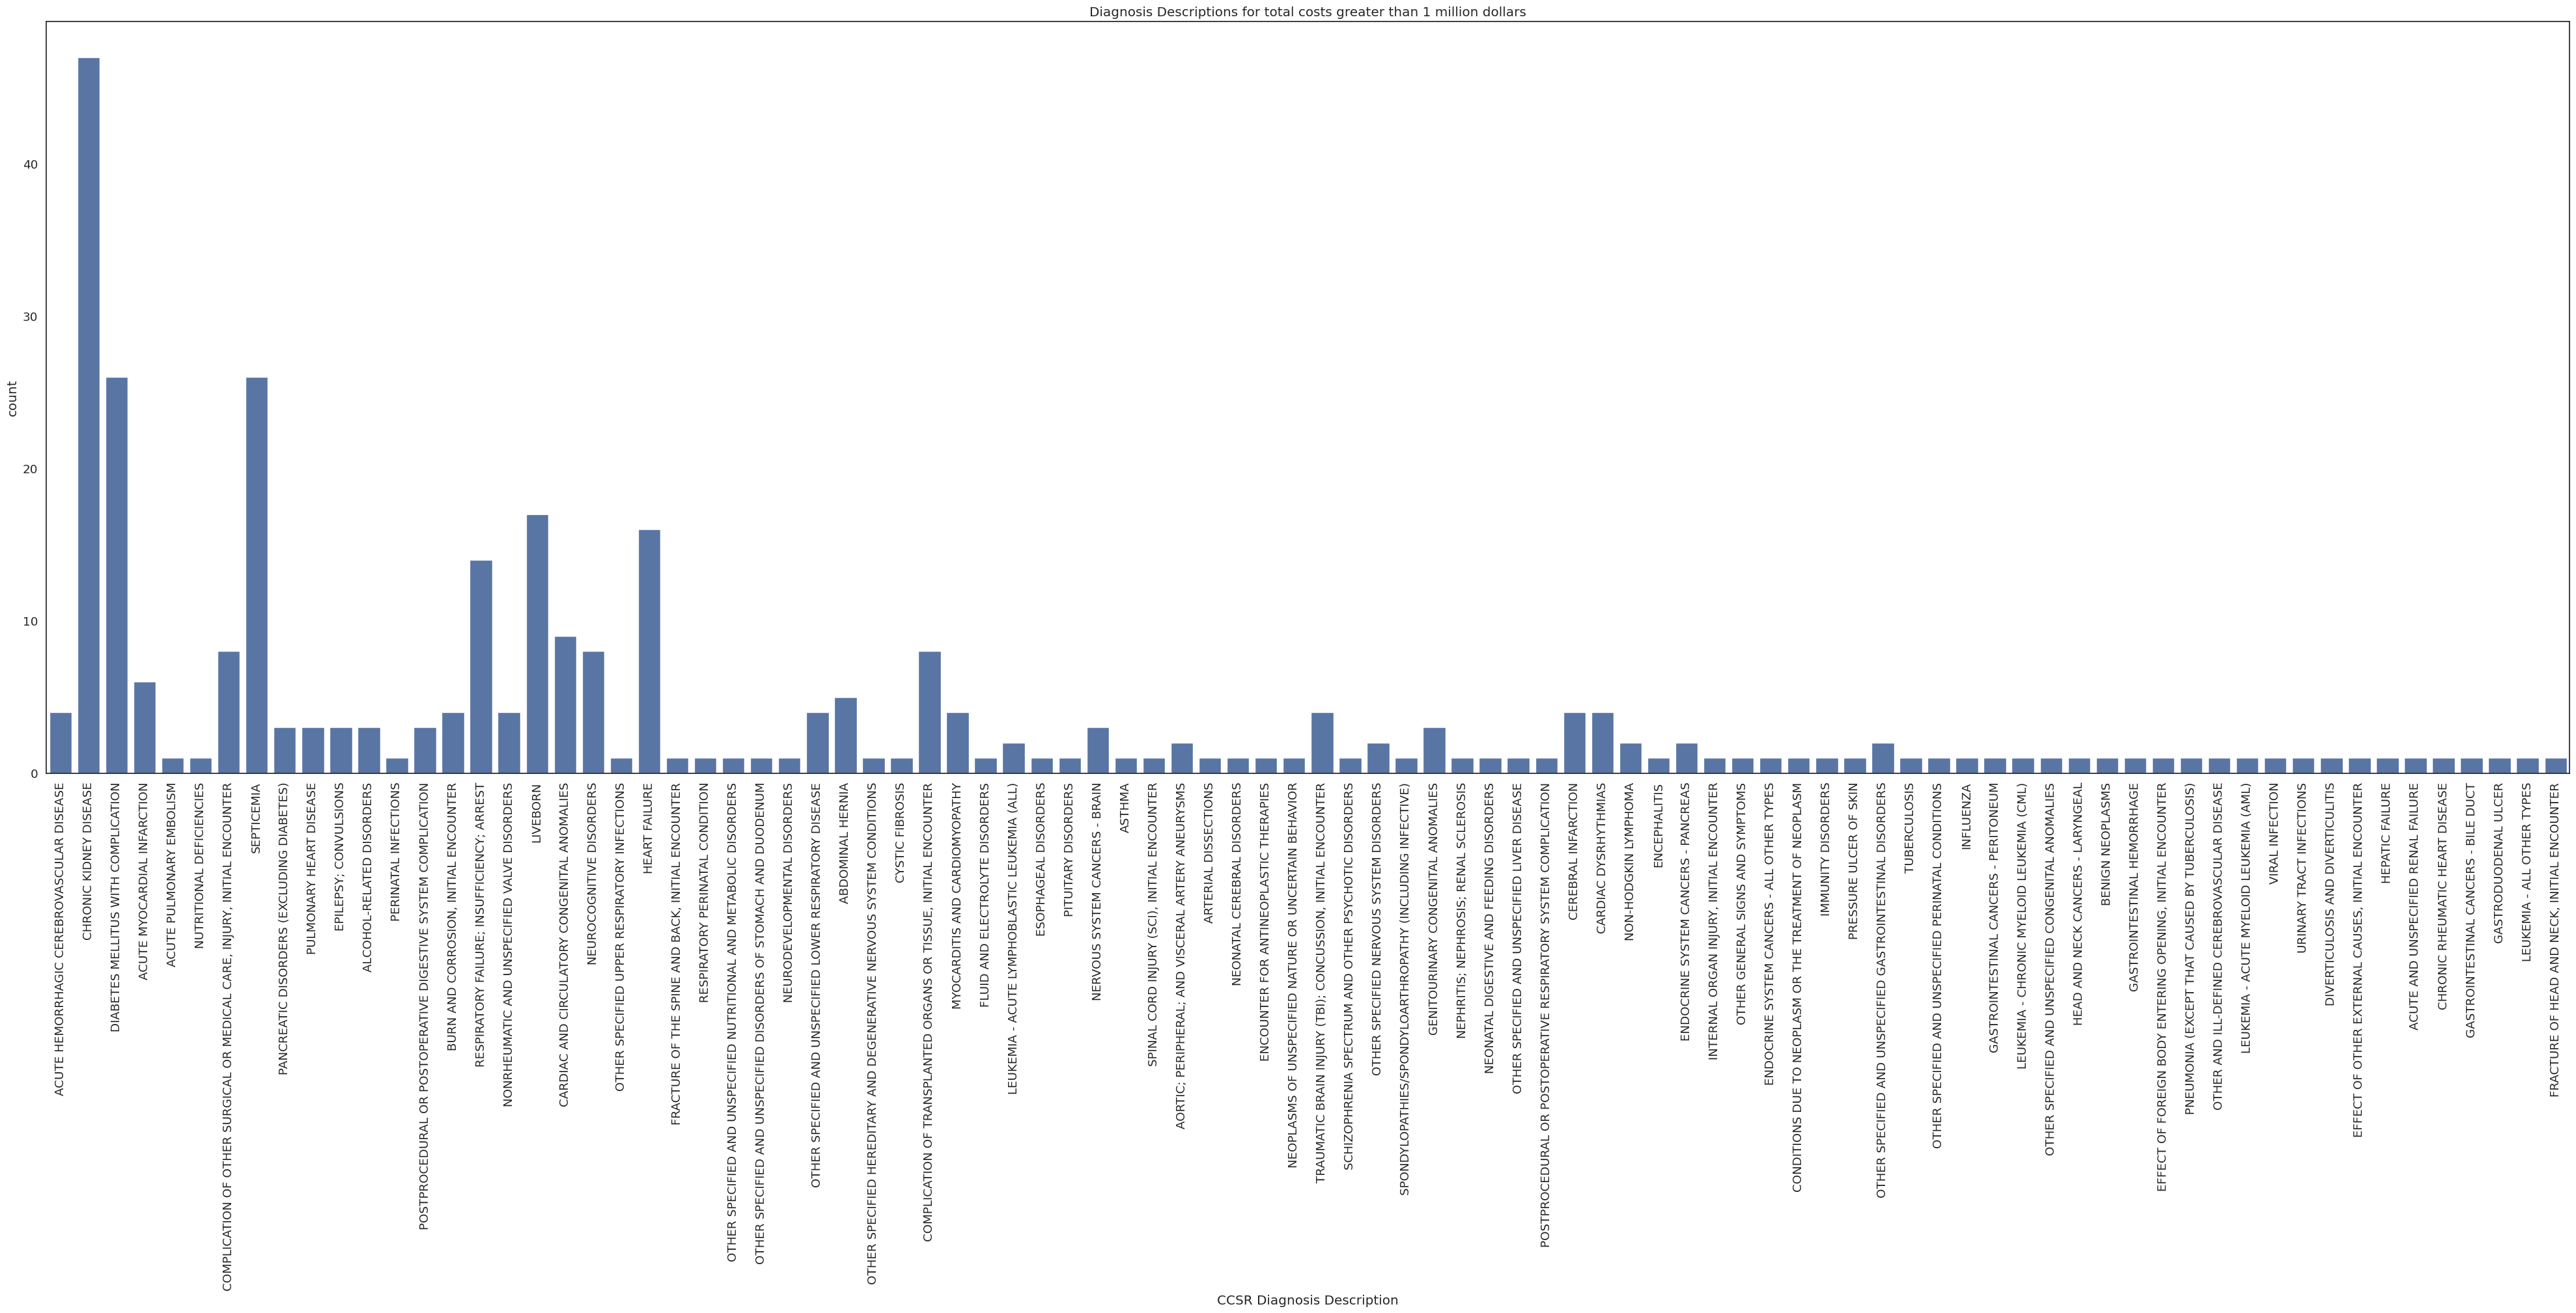

In [36]:
f, ax = plt.subplots(figsize=(50, 15))
sns.countplot(x='CCSR Diagnosis Description', data = data2019[data2019['Total Costs']>1000000])
plt.xticks(rotation=90)
plt.title('Diagnosis Descriptions for total costs greater than 1 million dollars')
plt.show()

This may imply that chronic kidney disease treatment is the most expensive

<Axes: xlabel='Gender', ylabel='Total Costs'>

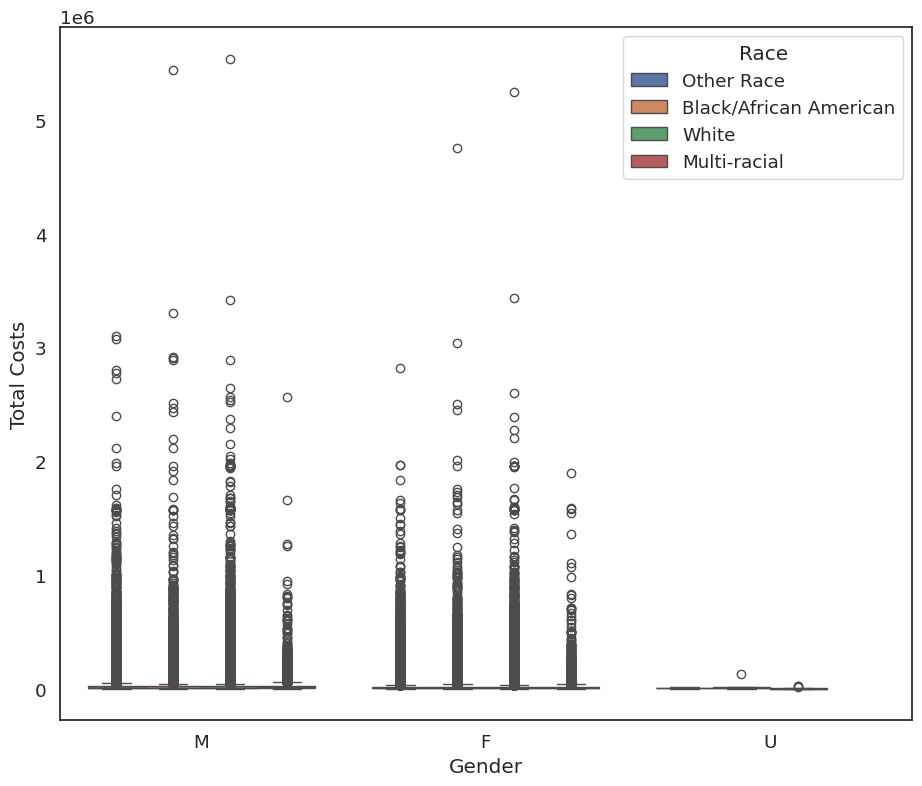

In [37]:
f, ax = plt.subplots(figsize=(11, 9))
sns.boxplot(x="Gender", y="Total Costs",
            hue="Race",
            data=data2019)

We can clearly see that the above graph is highly skewed across all genders and races, which makes it difficult to visualize the relationships. We can limit the range of Total Costs to clearly see the underlying distribution

[(0.0, 100000.0)]

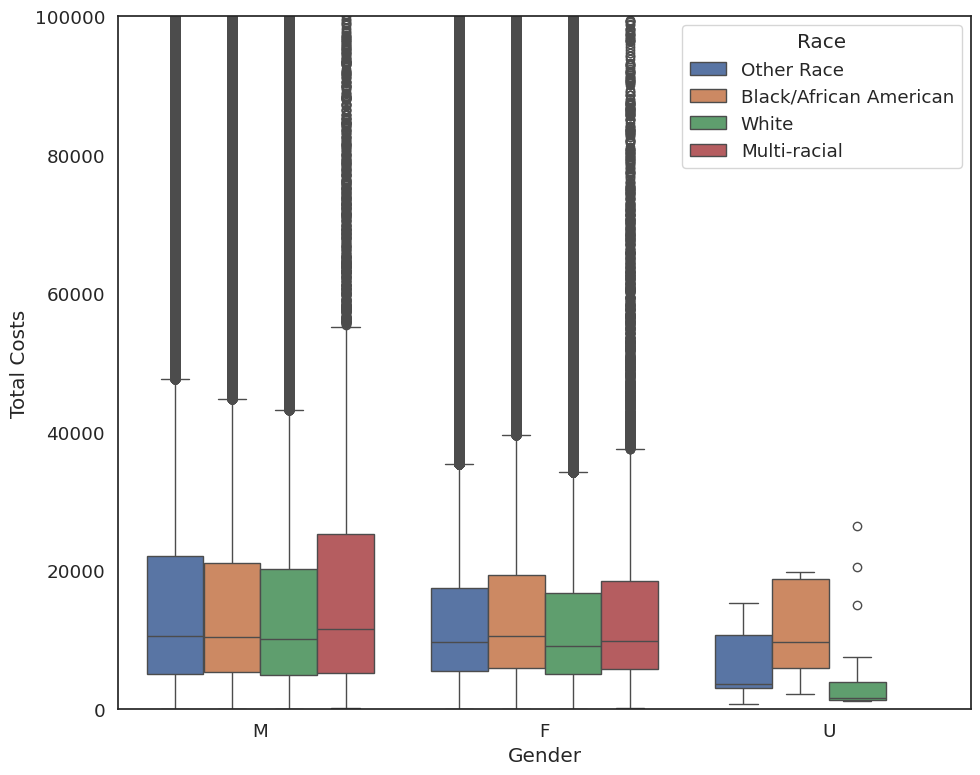

In [38]:
f, ax = plt.subplots(figsize=(11, 9))
sns.boxplot(x="Gender", y="Total Costs",
            hue="Race",
            data=data2019)
ax.set(ylim=(0, 100000))

/tmp/ipython-input-1069491095.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Age Group", y="Total Costs", order=['0 to 17','18 to 29','30 to 49','50 to 69','70 or Older'],


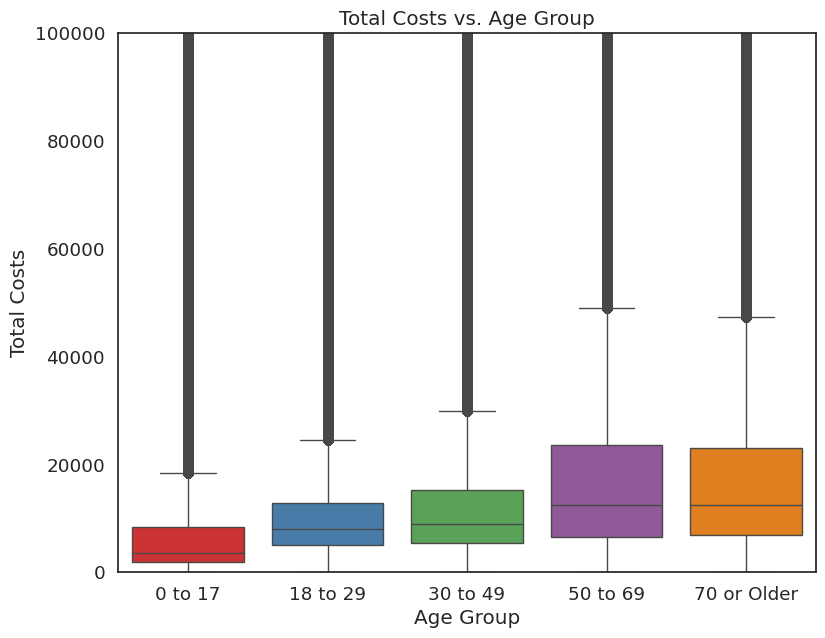

In [41]:
f, ax = plt.subplots(figsize=(9, 7))
sns.boxplot(x="Age Group", y="Total Costs", order=['0 to 17','18 to 29','30 to 49','50 to 69','70 or Older'],
            palette="Set1", data=data2019)
ax.set(ylim=(0, 100000))
plt.title('Total Costs vs. Age Group')
plt.show()

Here, we can see some significant variance in Total Costs across different age groups. It is evident that age groups 50-69 and 70 or older tend to have the higher total cost distribution

/tmp/ipython-input-1215572804.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="APR Severity of Illness Description", y="Total Costs", order=['Minor','Moderate','Major','Extreme'],


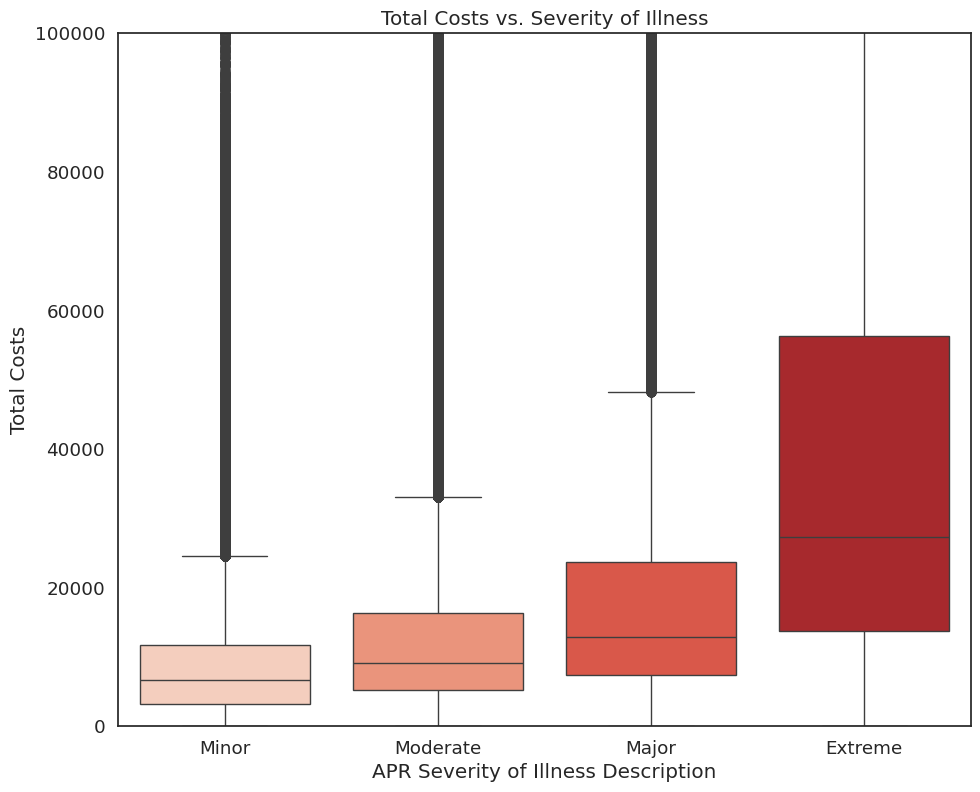

In [43]:
f, ax = plt.subplots(figsize=(11, 9))
sns.boxplot(x="APR Severity of Illness Description", y="Total Costs", order=['Minor','Moderate','Major','Extreme'],
            data=data2019, palette='Reds')
ax.set(ylim=(0, 100000))
plt.title('Total Costs vs. Severity of Illness')
plt.show()

There is high amounts of variance in Total Costs against the severity of illness feature. This will be an important feature to include in the model and will improve its predictive ability

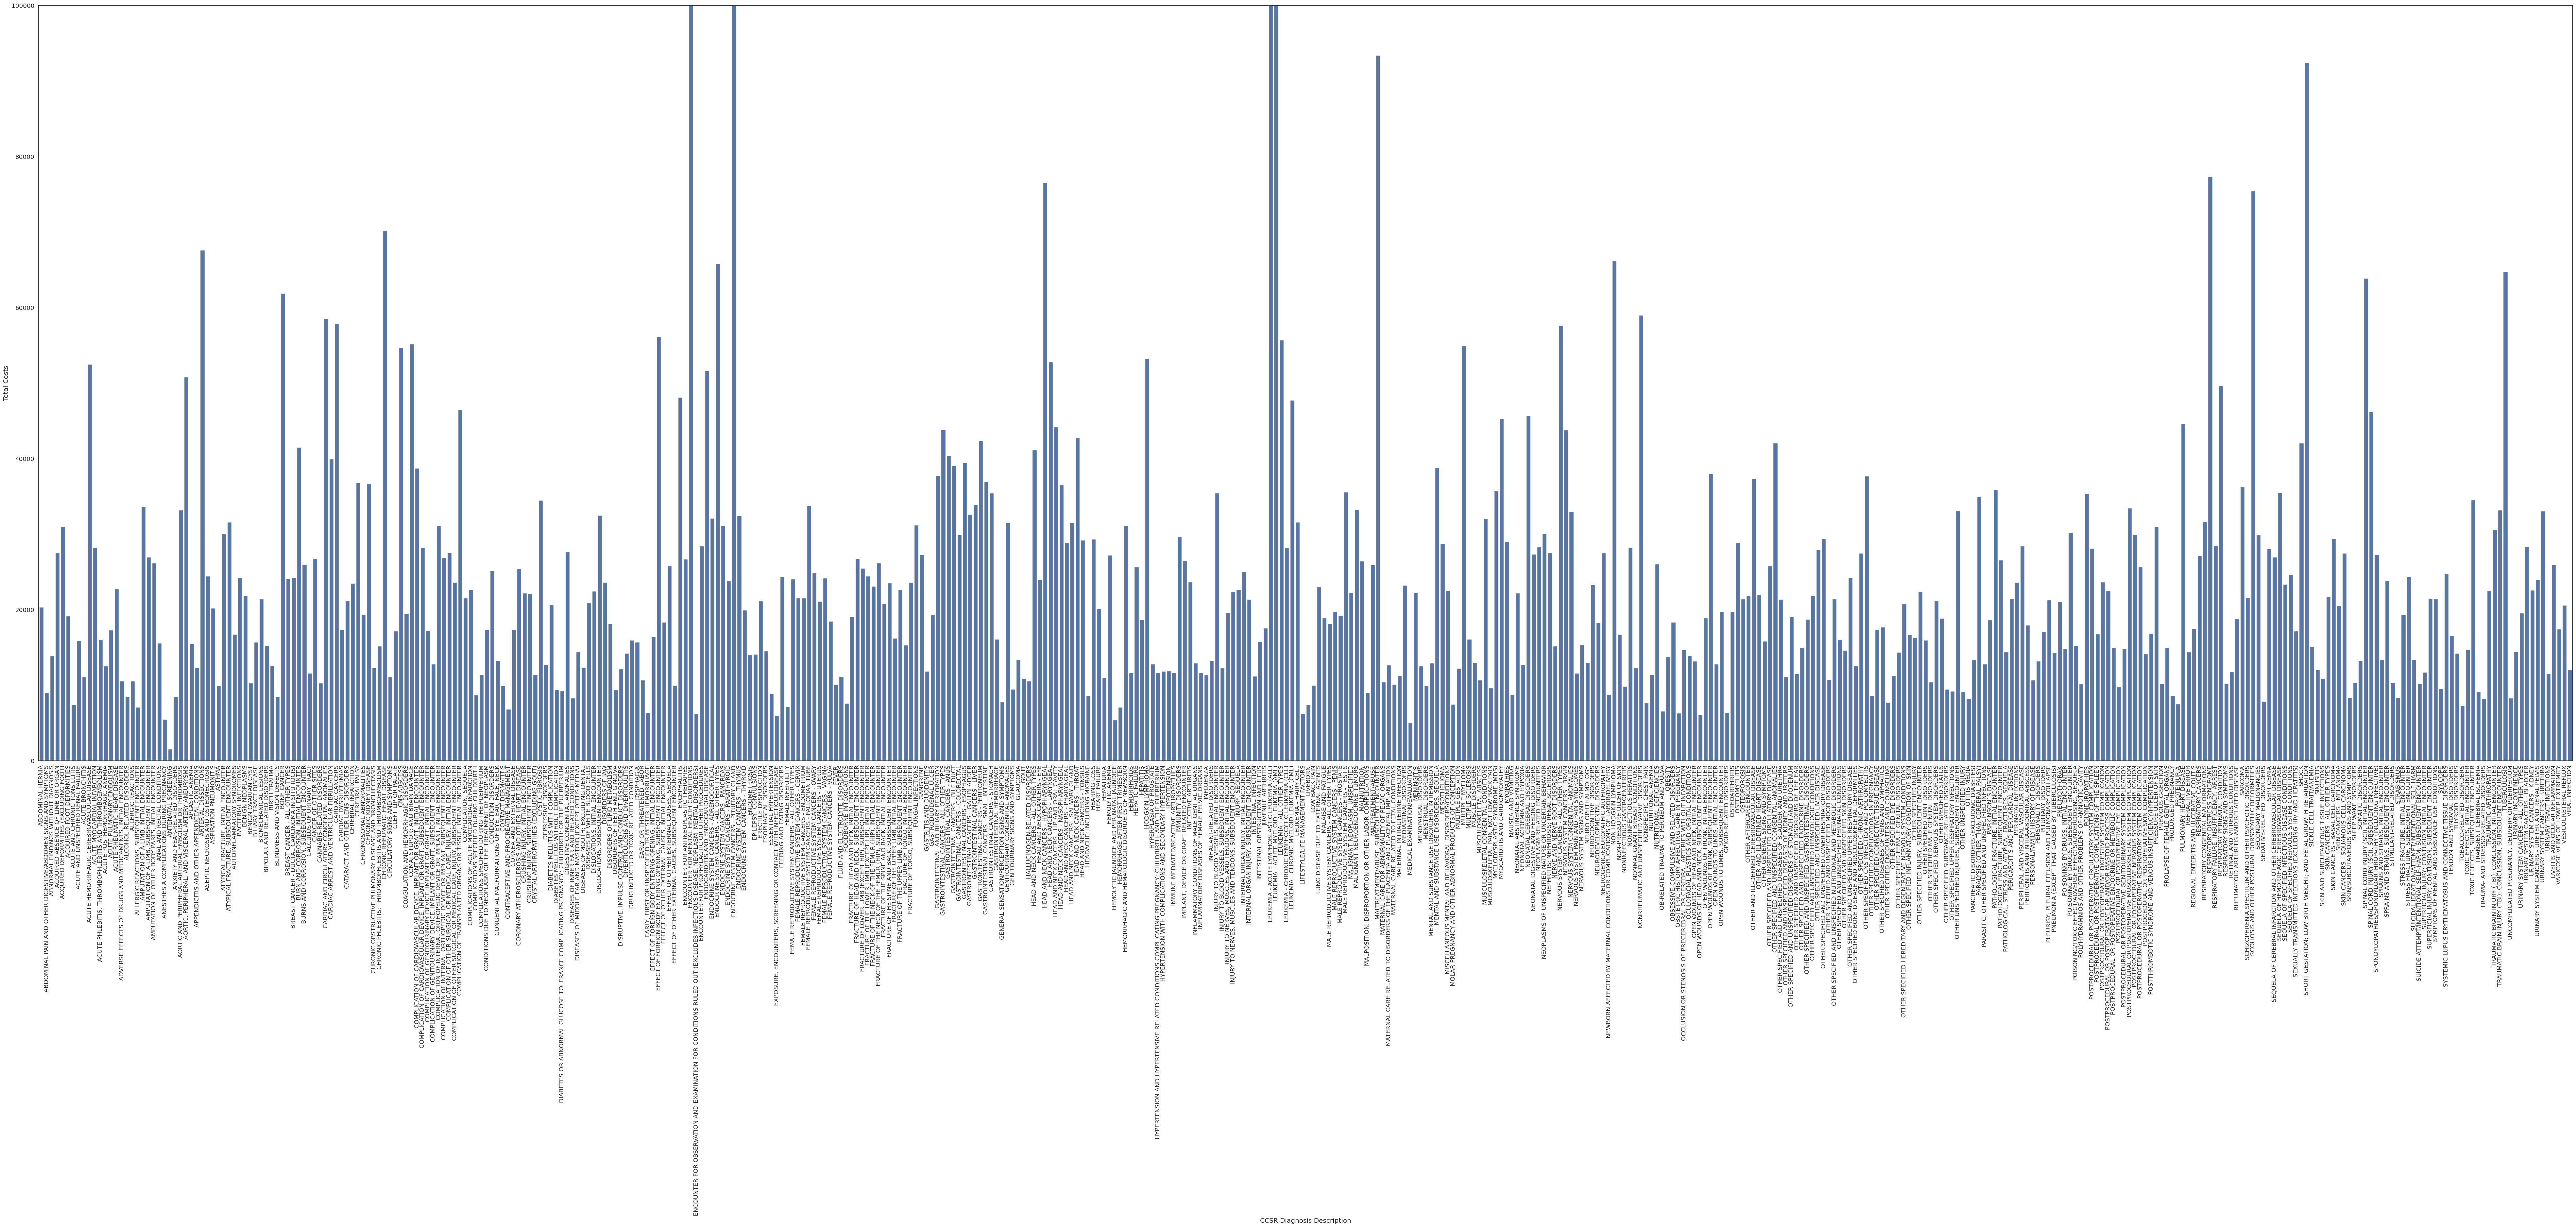

In [45]:
f, ax = plt.subplots(figsize=(100, 30))
sns.barplot(x="CCSR Diagnosis Description", y="Total Costs", data=data2019[['CCSR Diagnosis Description','Total Costs']].groupby('CCSR Diagnosis Description', as_index=False).mean())
ax.set(ylim=(0, 100000))
plt.xticks(rotation=90)
plt.show()

There are a lot of categories which makes it difficult to read. Let's create a dataframe and list diagnoses in descending order of average Total Costs to see the diagnosis descriptions that is the most expensive.

In [46]:
diag_cost_df = data2019[['CCSR Diagnosis Description','Total Costs']].groupby('CCSR Diagnosis Description', as_index=False).mean()
diag_cost_df = diag_cost_df.sort_values(by='Total Costs', ascending=False, ignore_index=True)
display(diag_cost_df)

CCSR Diagnosis Description    Total Costs
0           ENDOCRINE SYSTEM CANCERS - PITUITARY GLAND  123512.644000
1        LEUKEMIA - ACUTE LYMPHOBLASTIC LEUKEMIA (ALL)  121357.878858
2               ENCOUNTER FOR MENTAL HEALTH CONDITIONS  104995.505000
3              LEUKEMIA - ACUTE MYELOID LEUKEMIA (AML)  104992.492923
4             MALTREATMENT/ABUSE, SUBSEQUENT ENCOUNTER   93384.520000
..                                                 ...            ...
467  EXPOSURE, ENCOUNTERS, SCREENING OR CONTACT WIT...    5978.568372
468          ANESTHESIA COMPLICATIONS DURING PREGNANCY    5471.508000
469          HEMOLYTIC JAUNDICE AND PERINATAL JAUNDICE    5403.631244
470                     MEDICAL EXAMINATION/EVALUATION    5019.128765
471                                ANTENATAL SCREENING    1547.810000

[472 rows x 2 columns]

/tmp/ipython-input-2739478644.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="CCSR Diagnosis Description", x="Total Costs", data=diag_cost_df[0:5], palette='Set1')


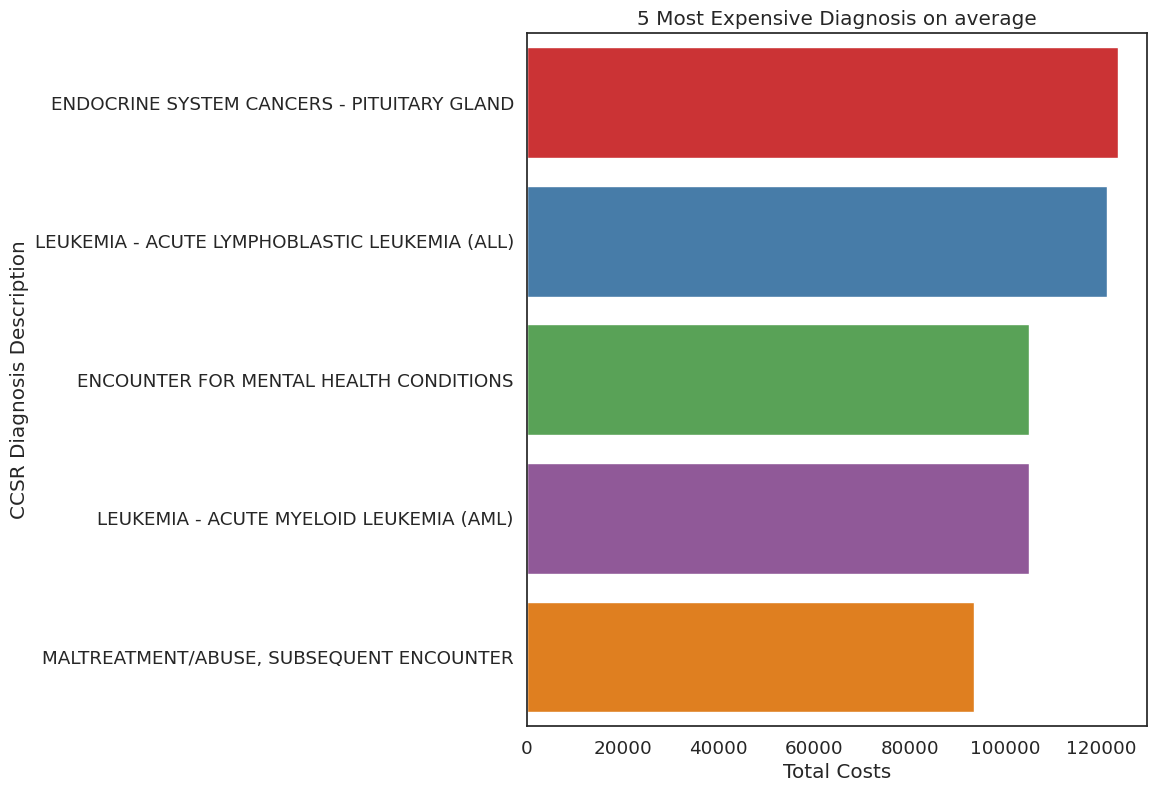

In [47]:
sns.set(font_scale=1.2)
sns.set_style("white")
f, ax = plt.subplots(figsize=(8, 9))
sns.barplot(y="CCSR Diagnosis Description", x="Total Costs", data=diag_cost_df[0:5], palette='Set1')
#plt.xticks(rotation=45)
plt.title('5 Most Expensive Diagnosis on average')
plt.show()

/tmp/ipython-input-1064513225.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Payment Typology 1", y="Total Costs", data=data2019, palette='Set1')


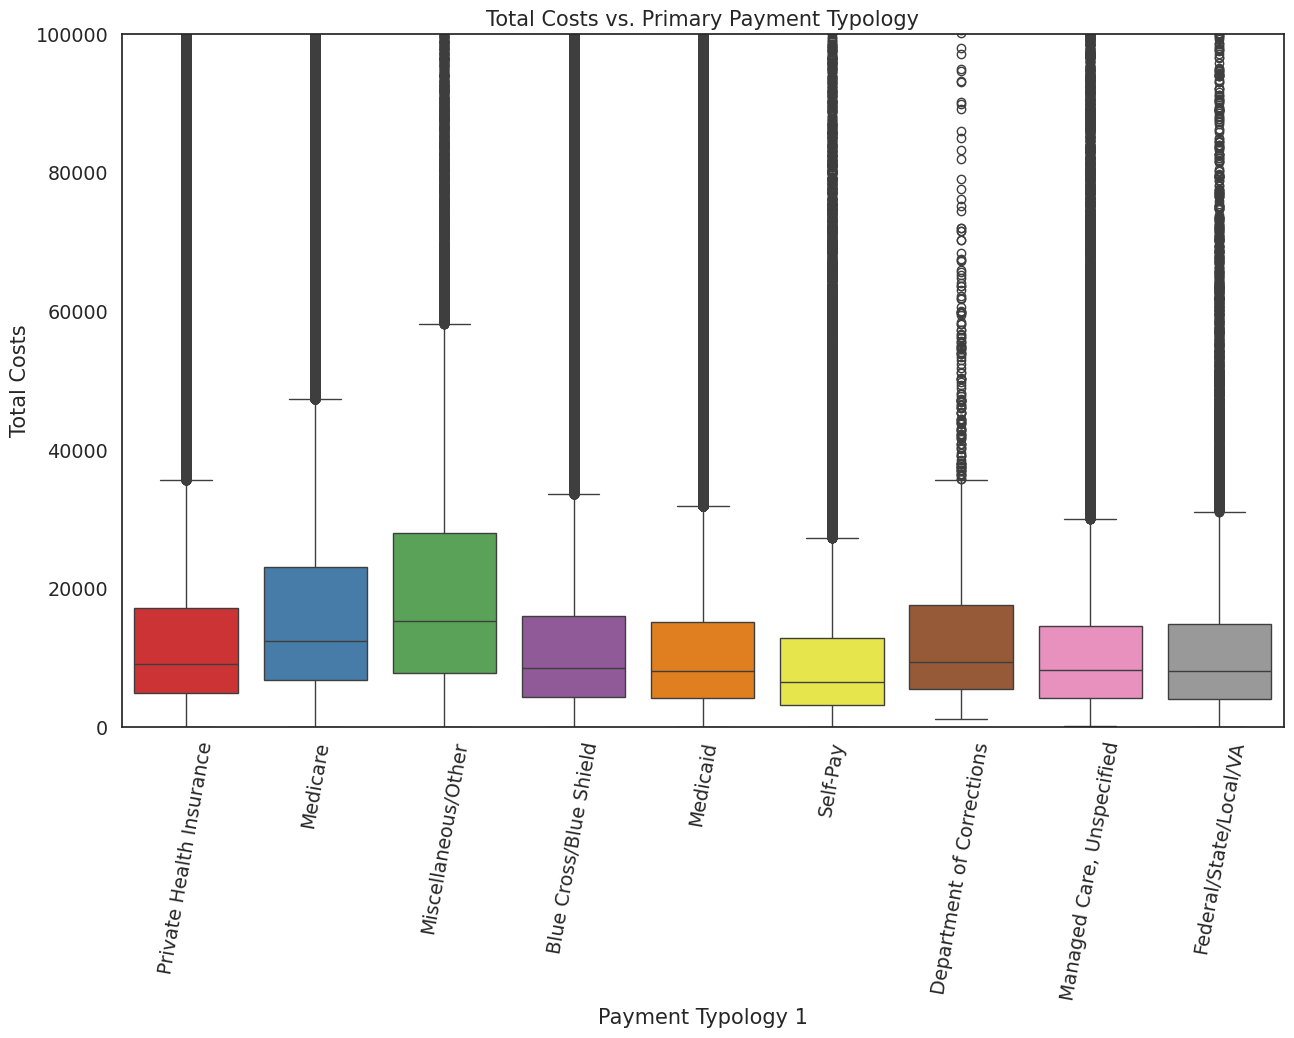

In [48]:
sns.set(font_scale=1.25)
sns.set_style("white")
f, ax = plt.subplots(figsize=(15, 9))
sns.boxplot(x="Payment Typology 1", y="Total Costs", data=data2019, palette='Set1')
ax.set(ylim=(0, 100000))
plt.xticks(rotation=80)
plt.title('Total Costs vs. Primary Payment Typology')
plt.show()

1.   **Private Health Insurance:** Employer-sponsored or individually purchased insurance plans (e.g., Aetna, UnitedHealthcare, Cigna).
2.   **Medicare**: Funded and run by the U.S. federal government.
3. **Miscellaneous/Other**: Could include international insurers, workers,compensation, auto insurance, charity programs, or experimental programs.
4. **Blue Cross/Blue Shield**: very common private insurance provider in the U.S.
5. **Medicaid:** Joint federal and state program for low-income individuals and families.
6. **Self-Pay:** Patients who pay out-of-pocket, without insurance.
7. **Department of Corrections:** Healthcare provided to incarcerated individuals, with costs covered by state/federal prison or jail systems.
8. **Managed Care, Unspecified:** Managed care usually means care is coordinated to control costs and quality.
9. **Federal/State/Local/VA:** Government-funded programs other than Medicare/Medicaid.VA (Veterans Affairs) – healthcare for U.S. military veterans.




Here, we see another feature that has a significant amount of variance in Total Costs across its categories. Medicare patients tend to be one of the most expensive.

/tmp/ipython-input-3068356089.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Age Group', data = data2019[data2019['Payment Typology 1']=='Medicare'], order=['0 to 17','18 to 29','30 to 49','50 to 69','70 or Older'], palette='Set1')


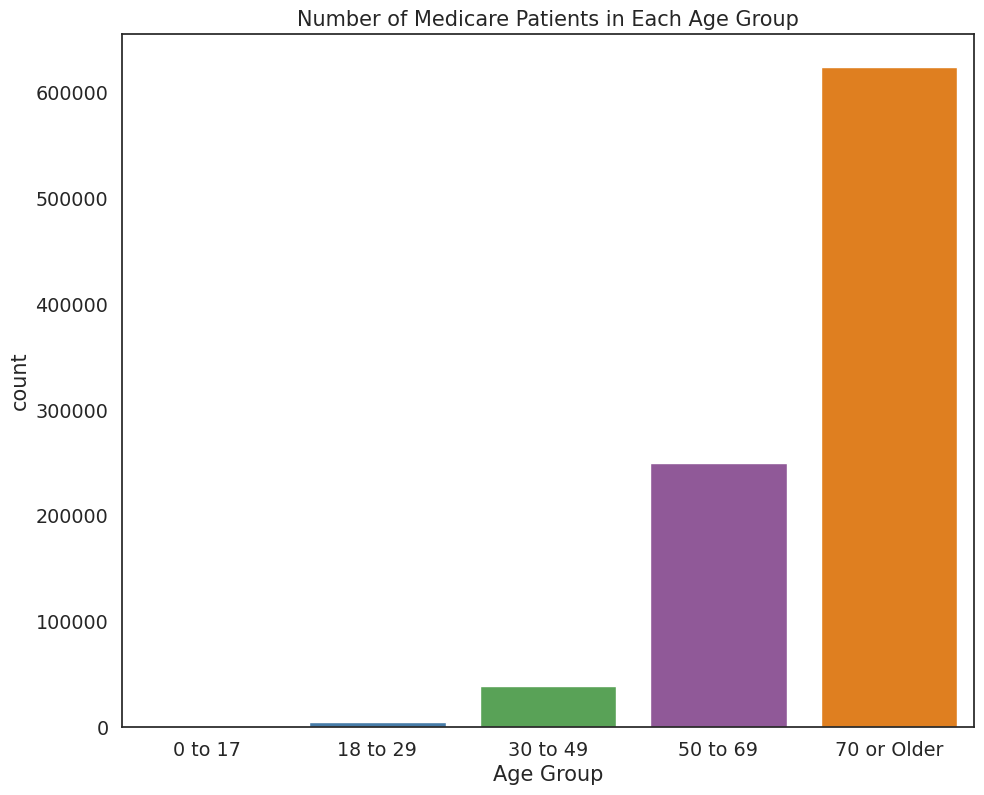

In [49]:
f, ax = plt.subplots(figsize=(11, 9))
sns.countplot(x='Age Group', data = data2019[data2019['Payment Typology 1']=='Medicare'], order=['0 to 17','18 to 29','30 to 49','50 to 69','70 or Older'], palette='Set1')
plt.title('Number of Medicare Patients in Each Age Group')
plt.show()

1. This may be because most medicare patients are in an older age bracket.
2. Age/Payment typology seem to be correlated in some ways, and these seem like they have an effect on the total costs of the patient

[(0.0, 100000.0)]

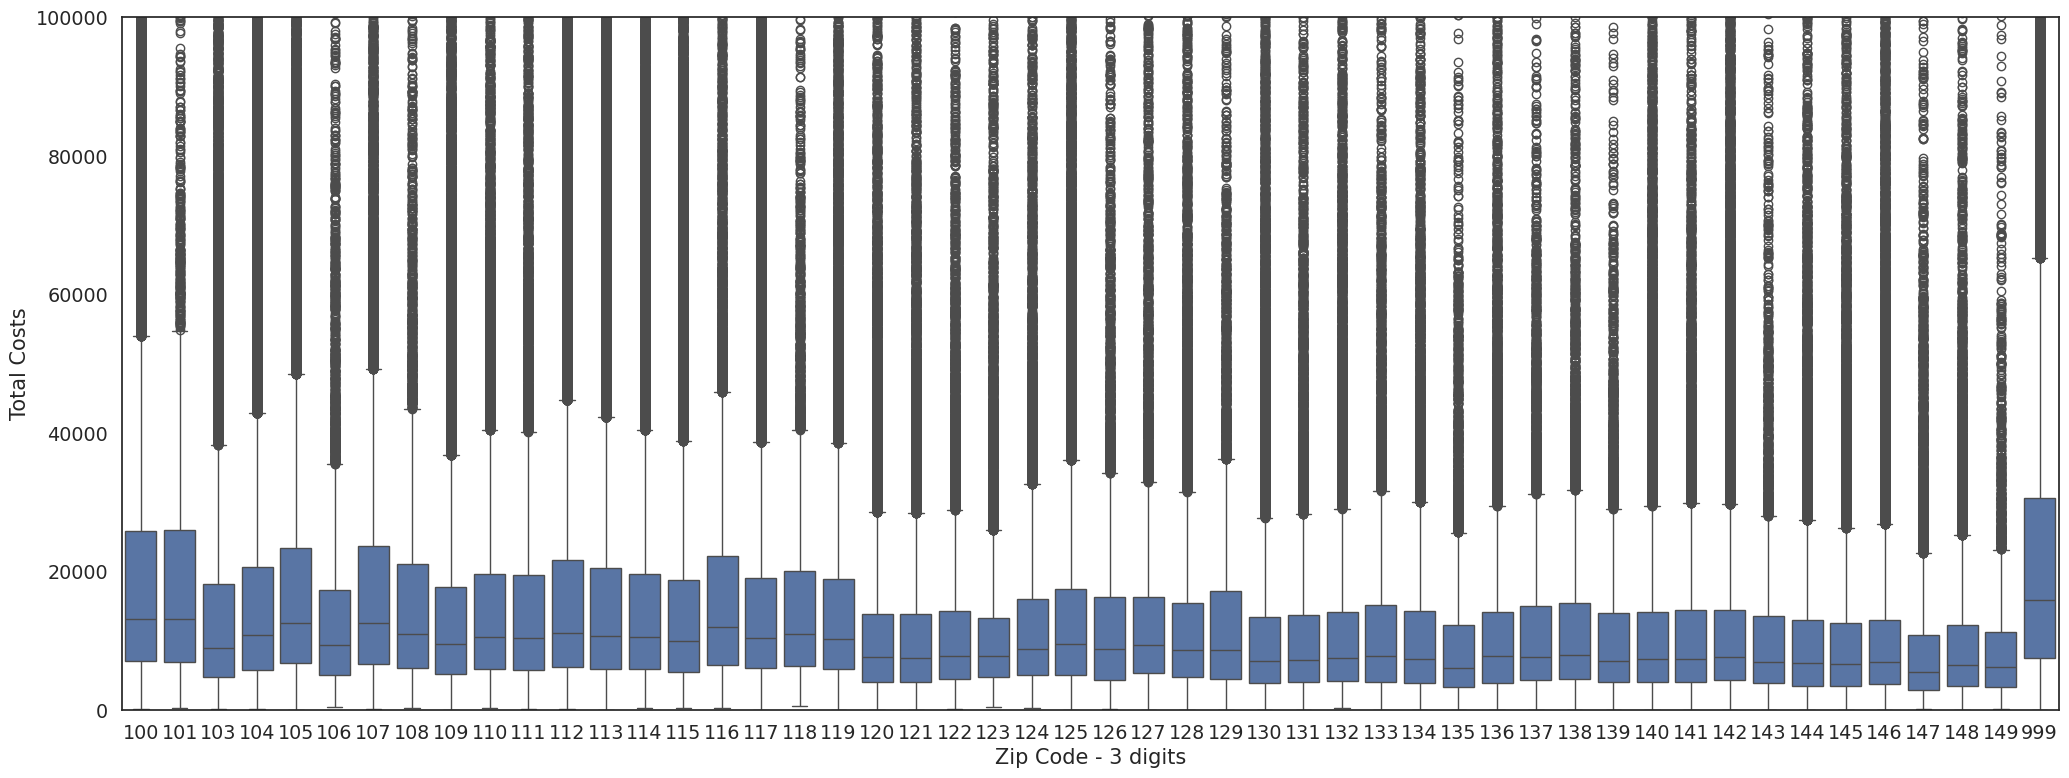

In [50]:
f, ax = plt.subplots(figsize=(25, 9))
sns.boxplot(x="Zip Code - 3 digits", y="Total Costs", data=data2019)
ax.set(ylim=(0, 100000))